<p style="font-family: cursive; text-align:center;font-size:2.3em;color:crimson;"> 
    <b>Mobile Price EDA and Classification with D-Tree, RF and SVM models</b> 
</p>

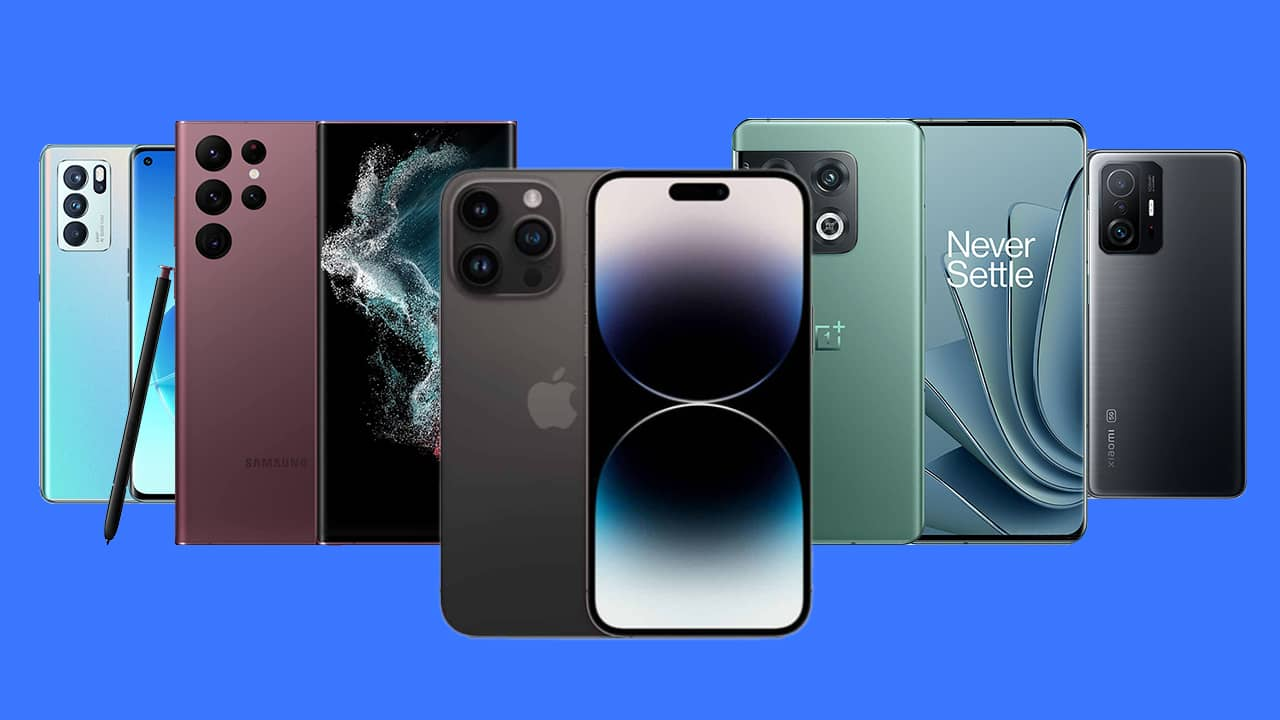

<p style="font-family: cursive; font-size:2.5em;color:green;">
    <b>1) Import Libraries</b> 
 </p>

In [6]:
%matplotlib inline
## General and Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import klib
from colorama import Fore,Style
import warnings
warnings.filterwarnings('ignore')

## Modeling and Evaluation Libraries
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,precision_score,roc_auc_score,recall_score,f1_score

<p style="font-family: cursive; font-size:2.5em;color:green;"> 
    <b>2) Import and Read data</b> 
</p>

In [7]:
df_original = pd.DataFrame(pd.read_csv('/kaggle/input/cell-phone-price/CellPhone_train.csv'))
df_unseen = pd.DataFrame(pd.read_csv('/kaggle/input/cell-phone-price/CellPhone_test.csv'))

<p style="font-family: cursive; font-size:1.7em;color:crimson;"> 
    <b>The Overview Of Data </b>
</p>

In [8]:
pd.options.display.max_columns = None
print('training data : \n')
display(df_original.head())
print('\nunseen data : \n')
display(df_unseen.head())

print(f'\nHere we have two datasets, original(training) dataset and unseen dataset : \nOriginal dataset has {Fore.RED}{df_original.shape[0]}{Style.RESET_ALL} rows and {Fore.RED}{df_original.shape[1]}{Style.RESET_ALL} columns that :')
print(f'The number of Samples is : {Fore.RED}{df_original.shape[0]}{Style.RESET_ALL}')
print(f'The target column is {Fore.RED}Price_range{Style.RESET_ALL} \nand other {Fore.RED}{df_original.shape[1]-1}{Style.RESET_ALL} columns are features')
print(f'Unseen dataset has {Fore.RED}{df_unseen.shape[0]}{Style.RESET_ALL} rows and {Fore.RED}{df_unseen.shape[1]}{Style.RESET_ALL} columns that :')
print(f'The number of Samples is : {Fore.RED}{df_unseen.shape[0]}{Style.RESET_ALL}')
print(f"and all {Fore.RED}{df_unseen.shape[1]}{Style.RESET_ALL} columns are features, We don't have any target")

training data : 



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1



unseen data : 



,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1



Here we have two datasets, original(training) dataset and unseen dataset : 
Original dataset has 2000 rows and 21 columns that :
The number of Samples is : 2000
The target column is Price_range 
and other 20 columns are features
Unseen dataset has 1000 rows and 21 columns that :
The number of Samples is : 1000
and all 21 columns are features, We don't have any target


<p style="font-family: cursive; font-size:1.7em;color:Crimson;"><b> Definition of dataset columns </b></p>
<p style="font-family: cursive; font-size:1.4em;color:Crimson;"><b> Features </b></p>
<p style="font-family: cursive; font-size:1.1em;color:blue;"> 
    <b>
        battery_power : Total energy of the battery can be stored(mAh)<br>
        blue : the device has blutooth or not, yes/no (1/0)<br>
        clock_speed : the speed of execution of instructions by microprocessor<br>
        dual_sim : the device has two SIM card at the same time or not<br>
        fc : the quality of front camera in MegaPixel<br>
        four_g : the device has 4G network or not<br>
        int_memory : internal memory in GigaByte<br>
        m_dep : the device depth in CM<br>
        mobile_wt : the weight of device<br>
        n_cores : the number of processor cores<br>
        pc : the quality of primary camera in MegePixel<br>
        px_height : the height of pixel resolution<br>
        px_width : the width of pixel resolution<br>
        ram : random access memory in MegaByte<br>
        sc_h : the height of device screen in CM<br>
        sc_w : the width of device screen in CM<br>
        talk_time : the maximum talk time that the full charge battery of the device can support <br>
        three_g : the device has 3G network or not<br>
        touch_screen : the device has touch screen or not<br>
        wifi : the device has wifi or not<br>
       </b> </p>
<p style="font-family: cursive; font-size:1.4em;color:Crimson;"><b> Target </b></p>
<p style="font-family: cursive; font-size:1.1em;color:blue;"><b> 
        price_range : the categorized price of the device<br>
        low cost = 0<br>
        medium cost = 1<br>
        high cost = 2<br>
        very high cost = 3<br>
    </b></p>

<p style="font-family: cursive; font-size:2.5em;color:green;"> 
    <b>3) Data Analysis and Visualization</b>
    </p>

<p style="font-family: cursive; font-size:1.2em;color:crimson;"><b> Part A </b></p>

    - dataframe information
    - check null values
    - check duplicate samples in both original and unseen dataset
    - continuous columns
    - descrete columns
    - description of original continuous columns
    - description of original descrete columns
    - description of unseen continuous columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,Null Values in original data
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


,Null Values in unseen data
id,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0


************************************************************************************************************************


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range



The number of duplicate samples in original dataset : 0



,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi



The number of duplicate samples in unseen dataset : 0

************************************************************************************************************************
Description of original Continuous columns : 


,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
pc,2000.0,9.91650,6.064315,0.0,5.00,10.0,15.00,20.0
px_height,2000.0,645.10800,443.780811,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,874.75,1247.0,1633.00,1998.0
ram,2000.0,2124.21300,1084.732044,256.0,1207.50,2146.5,3064.50,3998.0


the count of devices with pc = 0 :  101
the count of devices with fc = 0 :  474
the count of devices with pc = 0 & fc = 0: 101

************************************************************************************************************************
Description of original Descrete columns : 


,count,mean,std,min,25%,50%,75%,max
blue,2000.0,0.4950,0.500100,0.0,0.00,0.0,1.00,1.0
dual_sim,2000.0,0.5095,0.500035,0.0,0.00,1.0,1.00,1.0
four_g,2000.0,0.5215,0.499662,0.0,0.00,1.0,1.00,1.0
n_cores,2000.0,4.5205,2.287837,1.0,3.00,4.0,7.00,8.0
three_g,2000.0,0.7615,0.426273,0.0,1.00,1.0,1.00,1.0
touch_screen,2000.0,0.5030,0.500116,0.0,0.00,1.0,1.00,1.0
wifi,2000.0,0.5070,0.500076,0.0,0.00,1.0,1.00,1.0
price_range,2000.0,1.5000,1.118314,0.0,0.75,1.5,2.25,3.0


************************************************************************************************************************
Description of unseen columns : 


,count,mean,std,min,25%,50%,75%,max
id,1000.0,500.5000,288.819436,1.0,250.75,500.5,750.25,1000.0
battery_power,1000.0,1248.5100,432.458227,500.0,895.00,1246.5,1629.25,1999.0
blue,1000.0,0.5160,0.499994,0.0,0.00,1.0,1.00,1.0
clock_speed,1000.0,1.5409,0.829268,0.5,0.70,1.5,2.30,3.0
dual_sim,1000.0,0.5170,0.499961,0.0,0.00,1.0,1.00,1.0
fc,1000.0,4.5930,4.463325,0.0,1.00,3.0,7.00,19.0
four_g,1000.0,0.4870,0.500081,0.0,0.00,0.0,1.00,1.0
int_memory,1000.0,33.6520,18.128694,2.0,18.00,34.5,49.00,64.0
m_dep,1000.0,0.5175,0.280861,0.1,0.30,0.5,0.80,1.0
mobile_wt,1000.0,139.5110,34.851550,80.0,109.75,139.0,170.00,200.0


the count of devices with pc = 0 :  40
the count of devices with fc = 0 :  210
the count of devices with pc = 0 & fc = 0: 40

************************************************************************************************************************
Descrete Columns Classes : 

blue :  [0 1]
dual_sim :  [0 1]
four_g :  [0 1]
n_cores :  [2 3 5 6 1 8 4 7]
three_g :  [0 1]
touch_screen :  [0 1]
wifi :  [1 0]
price_range :  [1 2 3 0]
************************************************************************************************************************


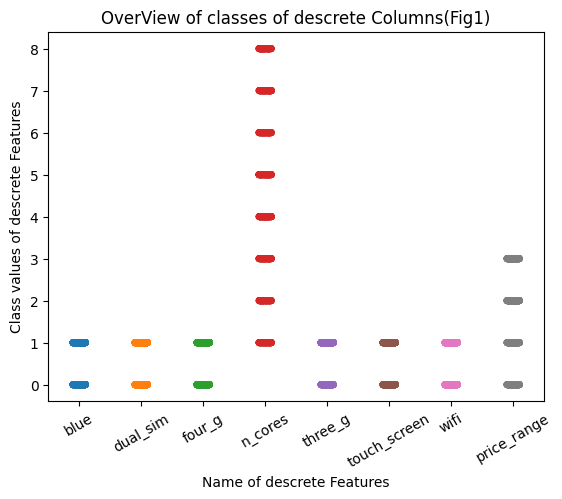

In [9]:
df_original.info() ## dataframe information 
print('\n','*'*120)
display(df_original.isna().sum().to_frame('Null Values in original data')) ## check the number of null values
display(df_unseen.isna().sum().to_frame('Null Values in unseen data')) ## check the number of null values
print('*'*120)
display(df_original[df_original.duplicated()])
print('\nThe number of duplicate samples in original dataset : %d\n' %(len(df_original[df_original.duplicated()]))) ## check duplicated samples
display(df_unseen[df_unseen.duplicated()])
print('\nThe number of duplicate samples in unseen dataset : %d\n' %(len(df_unseen[df_unseen.duplicated()]))) ## check duplicated samples

## devide columns to continuous columns and descrete columns
continuous_col = df_original.drop(['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi', 'price_range'],axis=1)
descrete_col = df_original[['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi', 'price_range']]

## description of columns
print('*'*120)
print('Description of original Continuous columns : ')
display(continuous_col.describe().T)
print('the count of devices with pc = 0 : ',len(df_original[df_original['pc']==0]))
print('the count of devices with fc = 0 : ',len(df_original[df_original['fc']==0]))
print("the count of devices with pc = 0 & fc = 0: %d\n"%len(df_original[(df_original['pc']==0)&(df_original['fc']==0)]))
print('*'*120)
print('Description of original Descrete columns : ')
display(descrete_col.describe().T)
print('*'*120)
print('Description of unseen columns : ')
display(df_unseen.describe().T)
print('the count of devices with pc = 0 : ',len(df_unseen[df_unseen['pc']==0]))
print('the count of devices with fc = 0 : ',len(df_unseen[df_unseen['fc']==0]))
print("the count of devices with pc = 0 & fc = 0: %d\n"%len(df_unseen[(df_unseen['pc']==0)&(df_unseen['fc']==0)]))

print('*'*120)
print('Descrete Columns Classes : \n')
for col in descrete_col :
    print('%s : ' %col , df_original[col].unique())
    
ax = sns.stripplot(data=descrete_col)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
print('*'*120)
plt.ylabel('Class values of descrete Features')
plt.xlabel('Name of descrete Features')
plt.title('OverView of classes of descrete Columns(Fig1)')
plt.show()

<p style="font-family: cursive; font-size:1.2em;color:crimson;"><b> Conclusion of Part A </b></p>


    -We see that all columns in original dataset have numeric dtypes(19 columns are integer and 2 columns are float), some 
    of them have continuous values and the rest of them have descrete values.
    - Continuous columns = battery_power, clock_speed, fc, int_memory, m_dep, mobile_wt, pc, px_height, px_width, ram, 
    sc_h, sc_w, talk_time(13 columns)
    - Descrete columns = blue, dual_sim, four_g, n_cores, three_g, touch_screen, wifi, price_range.(8 columns)
    - The report of null values check shows that there is not any null value in two datasets.
    - The report of duplicated samples check shows that there is not any duplicated sample in two datasets.
    - In descrete columns, some columns like blue, dual_sim, four_g, three_g, touch_screen and wifi are binary option, 
    n_cores column is an integer number in range [1,8] and price_range column is an integer number in range [0,3](Fig1)
    - As shown description of continuous columns, the minimum of front camera(fc) in some devices is zero that shows that 
    they don't have front camera, also zero value in the min column of primary camera(pc) shows that some devices don't 
    have any primary camera. Also the report of the number of devices without front camera and primary camera shoes that 
    all devices without primary camera, don't have front camera.(101 devices don't have primary camera, 101 devices don't 
    have primary camera and front camera)
    - in original dataset : 
      5.05% devices don't have pc, 23.7% devices don't have fc and 5.05% devices don't have both pc and fc.
    - in unseen dataset : 
      4% devices don't have pc, 21% devices don't have fc and 4% devices don't have both pc and fc.
    - Also in the min column of sc_w and px_height, we see zero values that mean the screen width of some devices and the 
    pixel height of some devices are zero. Since the zero value of width of screen while the value of its height is 
    positive and valid is not reasonable, so the validation of these values must be checked later.
    - Since the maximum of px_height and px_width are about close to each other, we expect that their minimum will be close 
    to each other too but a lot of px_height values are so smaller than the minimum of px_width, so it shows that some data 
    seems to be suspicious and we should check them meticulously later.
    - Since the maximum of sc_h and sc_w are about close to each other, we expect that their minimum will be close 
    to each other too but a lot of sc_w values are so smaller than the minimum of sc_h, so we should check them later.
    - We can see that all of the features' ranges in the original dataset description and the unseen dataset description 
    are almost close to each other, which shows the congruence of them.

<p style="font-family: cursive; font-size:1.2em;color:crimson;"><b> Part B </b></p>

    - visualization and analysis of descrete columns of original dataset
    - the number of devices in different classes of each column 
    - percent of the number of devices in classes of each column
    - the number of devices in different classes of each column(categorized by target)

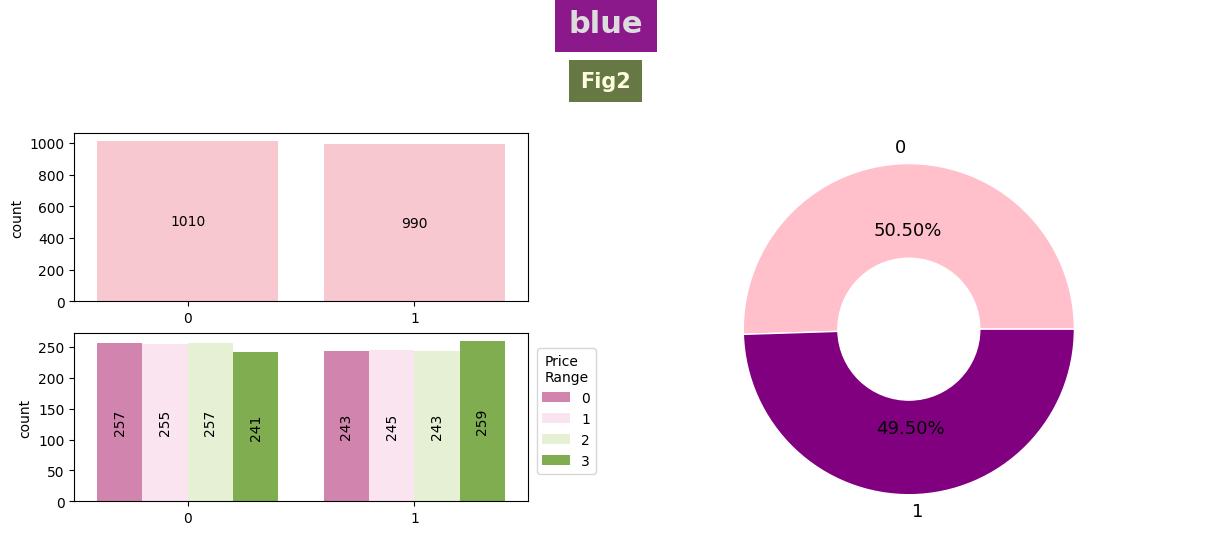

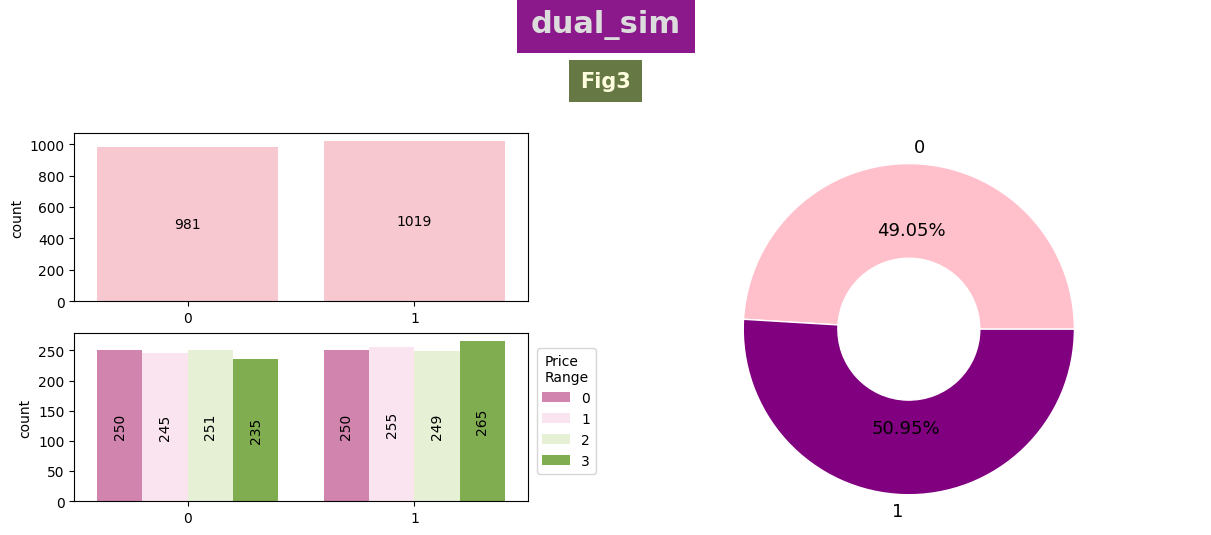

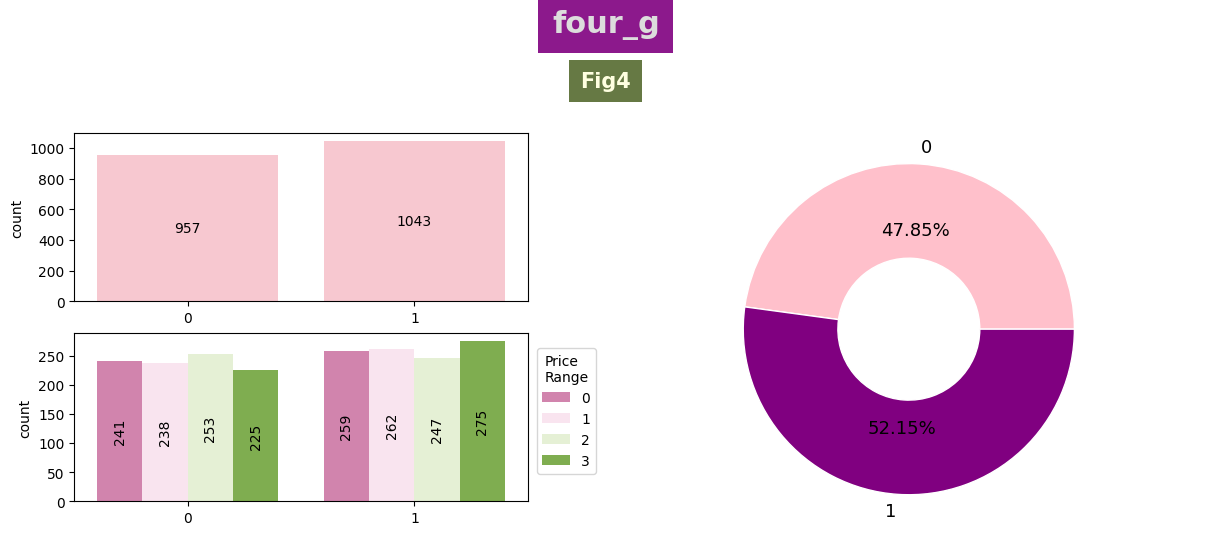

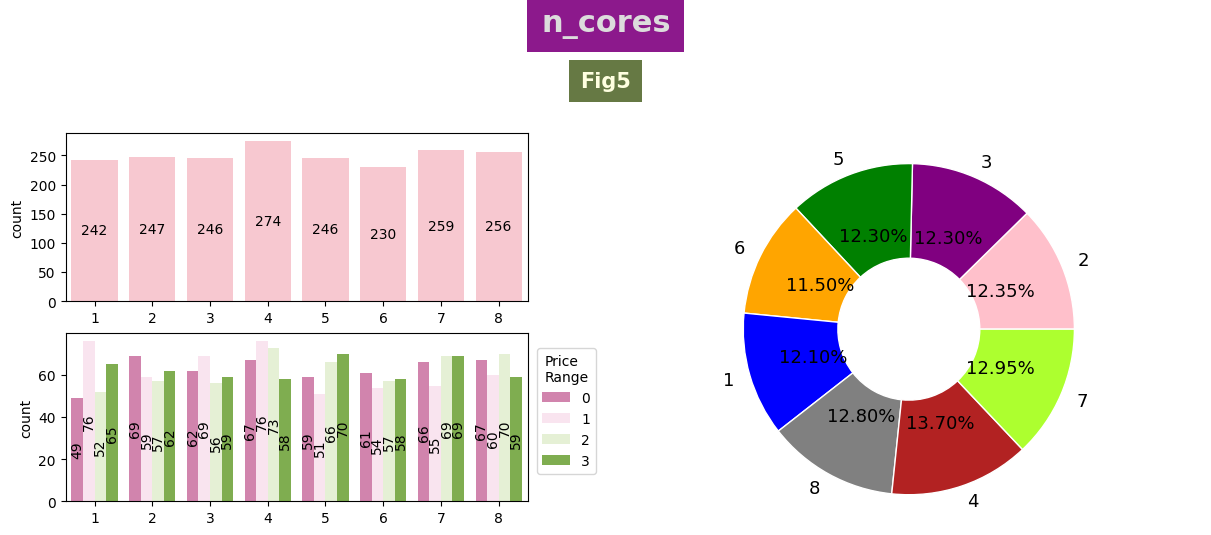

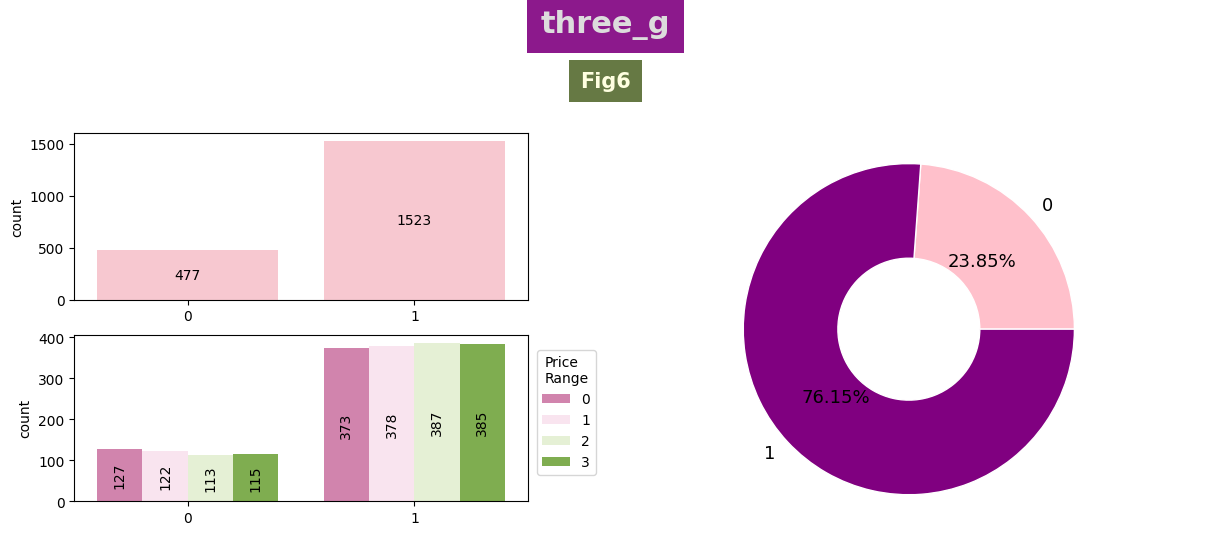

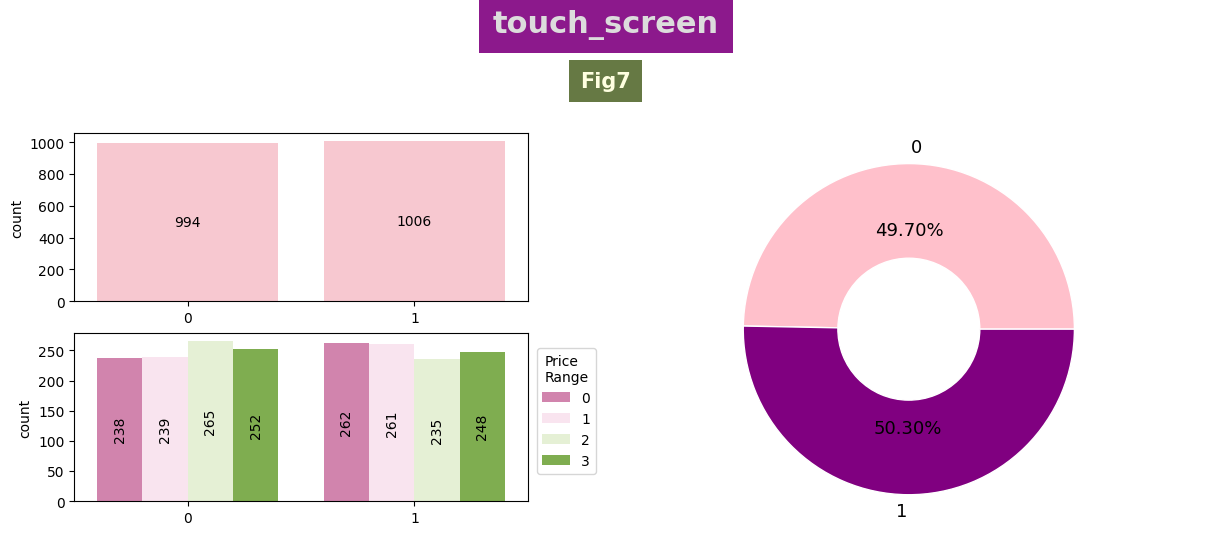

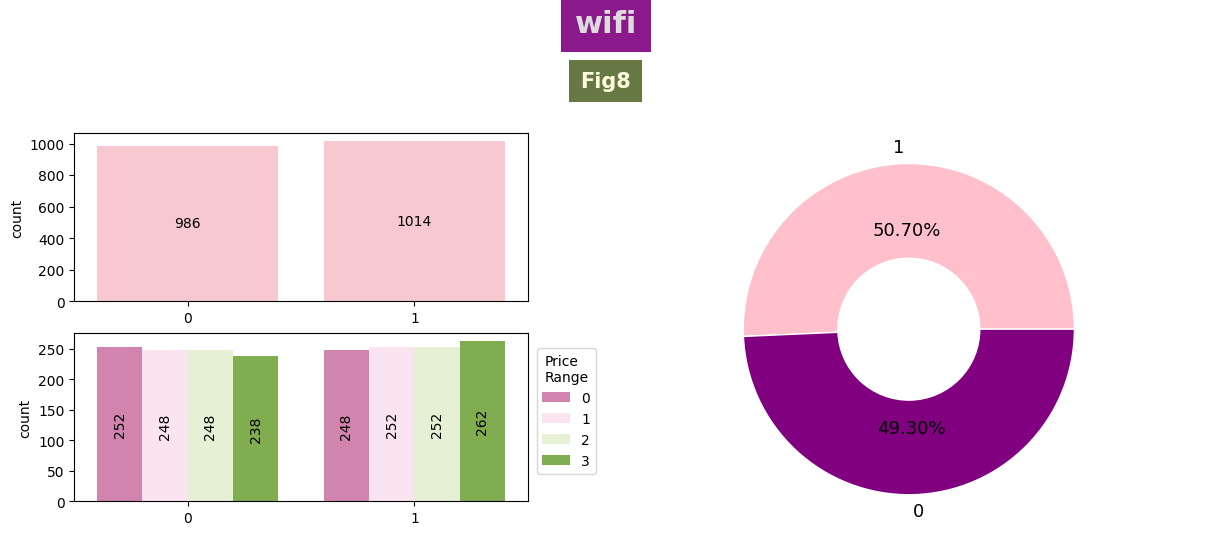

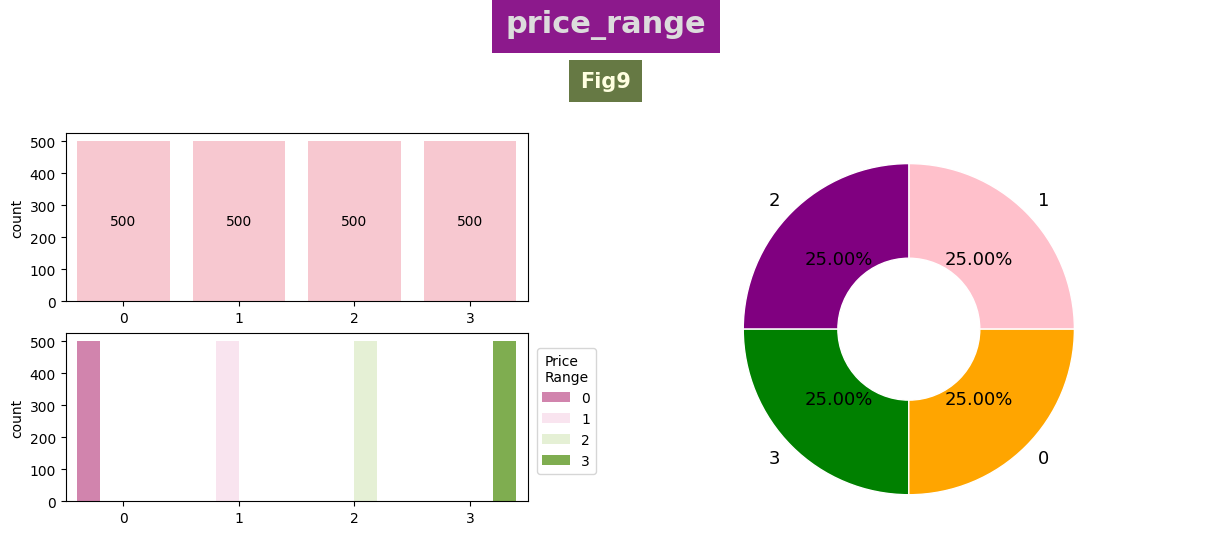

In [10]:
pie_name=[] ## name of classes of each column
pie_value=[] ## number of samples in each class of each column

for i,col in enumerate(list(descrete_col.columns)):
    pie_name1=[]
    pie_value1=[]
    for j in range(len(descrete_col[col].unique())) :
        pie_name1.append(descrete_col[col].unique()[j])
        pie_value1.append(descrete_col[descrete_col[col]==pie_name1[j]][col].count())
    pie_name.append(pie_name1)
    pie_value.append(pie_value1)

#####################################################################################################################
for i,col in enumerate(list(descrete_col.columns)):
    fig = plt.figure(figsize = (12,4),constrained_layout = True, dpi=100)
    GridSpec = gridspec.GridSpec(ncols=2, nrows=1, figure= fig)
    fig.suptitle(col,fontsize=22, fontweight='bold', color='gainsboro', y=1.3 ,
                 bbox=dict(facecolor='purple', alpha=0.9,linewidth=0,pad=10))
    fig.text(0.5, 1.12, f'Fig{i+2}', fontsize=15, ha='center', va='center', color='lightyellow', fontweight='bold',
             bbox=dict(facecolor='darkolivegreen', alpha=0.9,linewidth=0,pad=8))
    
    # Subfigure 1
    subfigure_1= fig.add_subfigure(GridSpec[:,0])
    # Adding subplots to subfigure 1
    subplots_1= subfigure_1.subplots(2,1) 
    
    ax = sns.countplot(data=df_original, x=col,color = 'pink',ax=subplots_1[0])
    ax.bar_label(ax.containers[0],label_type='center')

    ax.set(xlabel='')
    ax = sns.countplot(data=df_original, x=col,hue='price_range',palette = 'PiYG',ax=subplots_1[1])
    for j in range(len(descrete_col['price_range'].unique())) :
        if col != 'price_range' :
            ax.bar_label(ax.containers[j],label_type='center',fontsize=10,rotation=90)
    ax.set(xlabel='')
    plt.legend(bbox_to_anchor=(1.02, 0.91), loc='upper left', borderaxespad=0,title='Price\nRange')

    # Subfigure 2
    subfigure_2= fig.add_subfigure(GridSpec[:,1])
    # Adding subplots to subfigure 2
    subplots_2= subfigure_2.subplots(1,1)

    colors=['pink', 'purple','green','orange', 'blue','gray','firebrick','greenyellow']

    # Outside Ring
    subplots_2.axis('equal')
    pie1, _,juck = subplots_2.pie(pie_value[i], radius=0.7, labels=pie_name[i],
                             autopct='%1.2f%%', textprops={'fontsize': 13} , colors= colors[:(len(pie_name[i]))]
    )
    
    # inner white Ring
    plt.setp( pie1, width=0.4, edgecolor='white')

    plt.show()

<p style="font-family: cursive; font-size:1.2em;color:crimson;"><b> Conclusion of Part B </b></p>
 
    - All descrete columns in original dataset are almost balanced in number of samples in each classes except three-g :
         - Blu => 990(49.5%) devices have bluetooth and 1010(50.5%) devices don't.(Fig2)
         - dual_sim => 1019(50.95%) devices are dual-sim and 981(49.05%) devices are not.(Fig3)
         - four_g => 1043(52.15%) devices have 4G network and 957(47.85%) devices don't.(Fig4)
         - n_cores => 4-cores devices with 274(13.7%) and 6-core devices with 230(11.5%) have the highest and the lowest 
         number of devices respectively.(Fig5)
         - three_g => 1523(76.15%) devices have 3G network and 477(23.85%) devices don't.(Fig6)
         - touch_screen => 1006(50.3%) devices have touch screen and 994(49.7%) devices don't.(Fig7)
         - wifi => 1014(50.7%) devices have wifi and 986(49.3%) devices don't.(Fig8)
         - price_range => data set is fully balanced in this column. number of devices in each class is 250(25%).(Fig9)
    - The important point that can be extracted from the countplot of descrete columns vs. price_range (target) is that in 
    all descrete columns, the number of samples in 4 classes of price_range in each class of descrete columns is almost 
    balanced, which means that these features have very low effects on target and we have to consider other features for 
    finding clear effects.

<p style="font-family: cursive; font-size:1.2em;color:crimson;"><b> Part C </b></p>
  
    - visualization and analysis of continuous columns of original dataset
    - Distribution of continuous columns
    - checking noise
    - checking irrelevent and unreasonable values

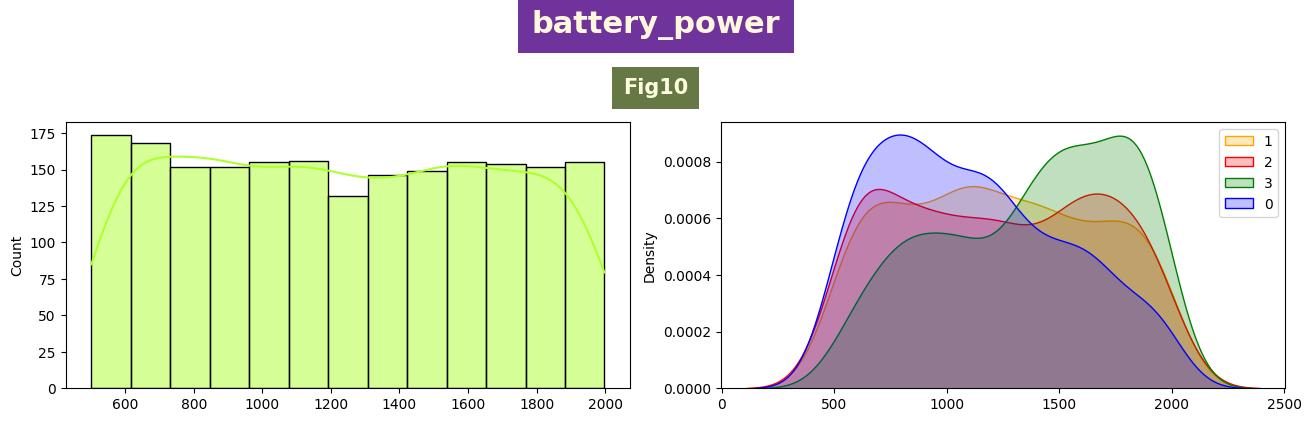

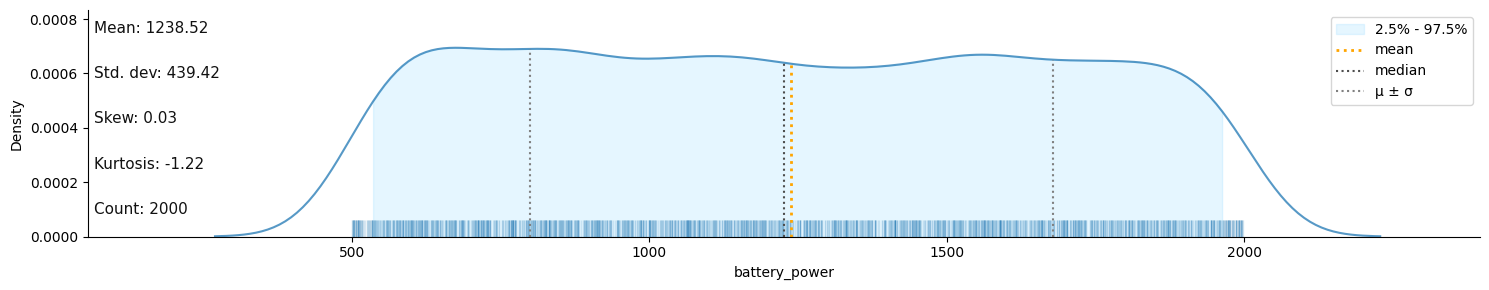

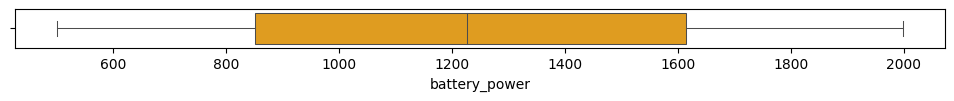

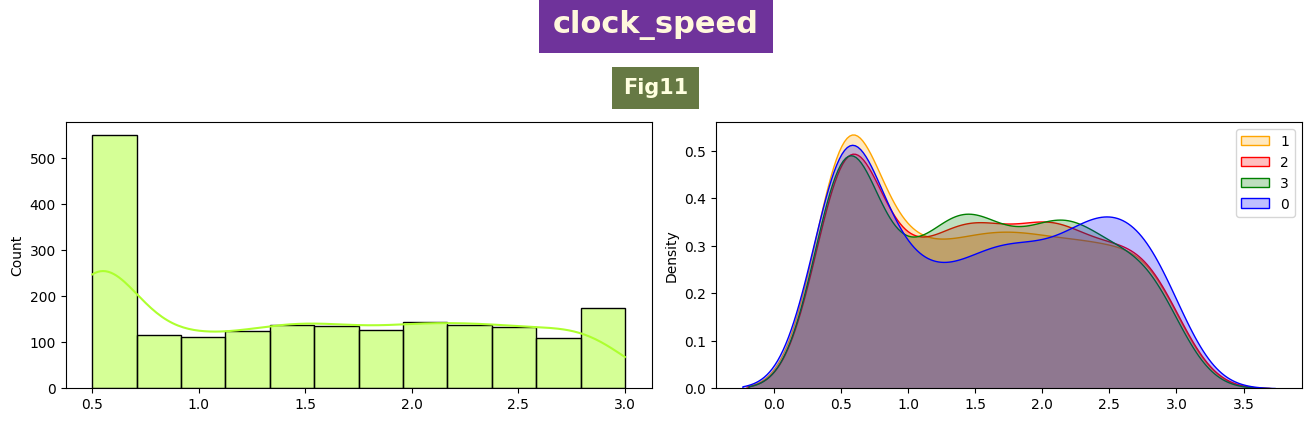

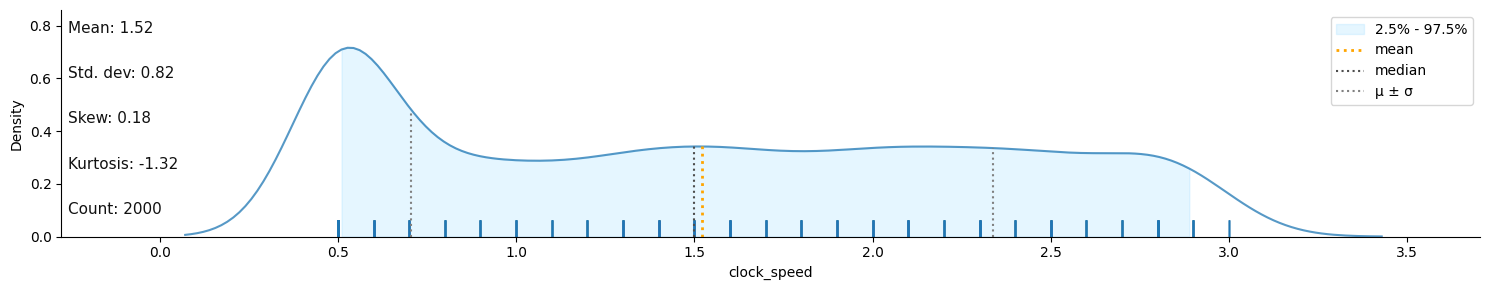

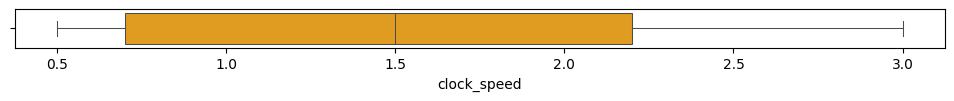

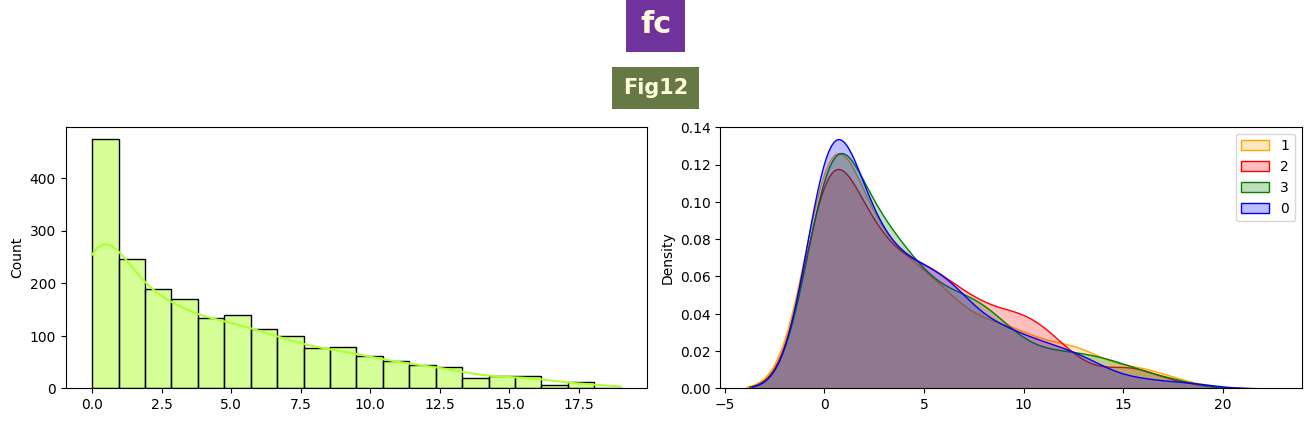

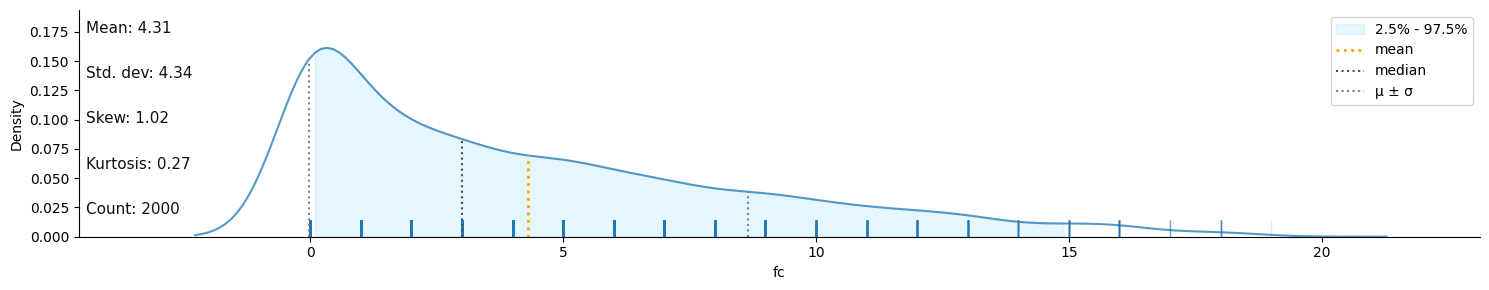

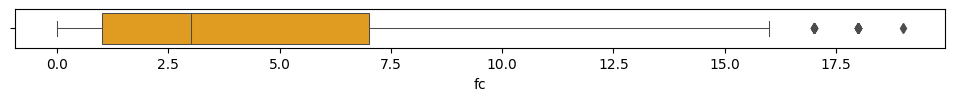

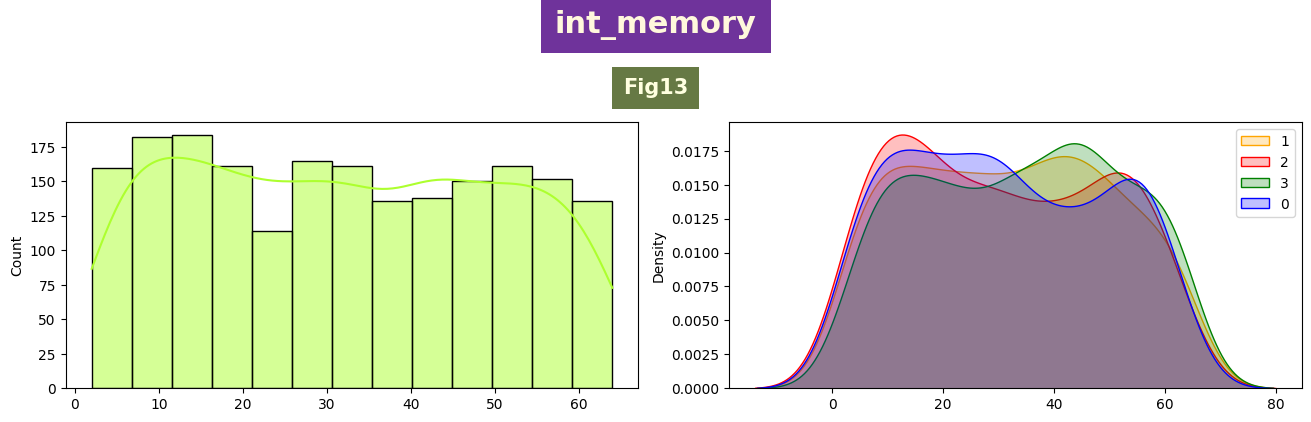

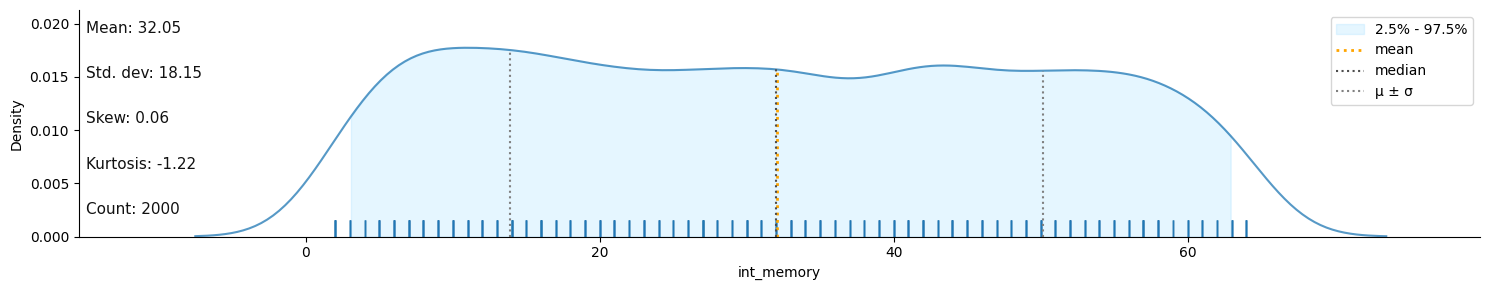

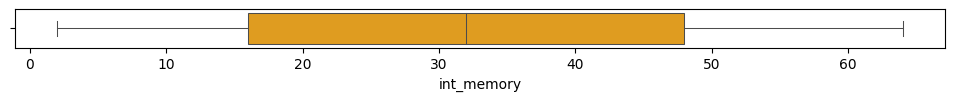

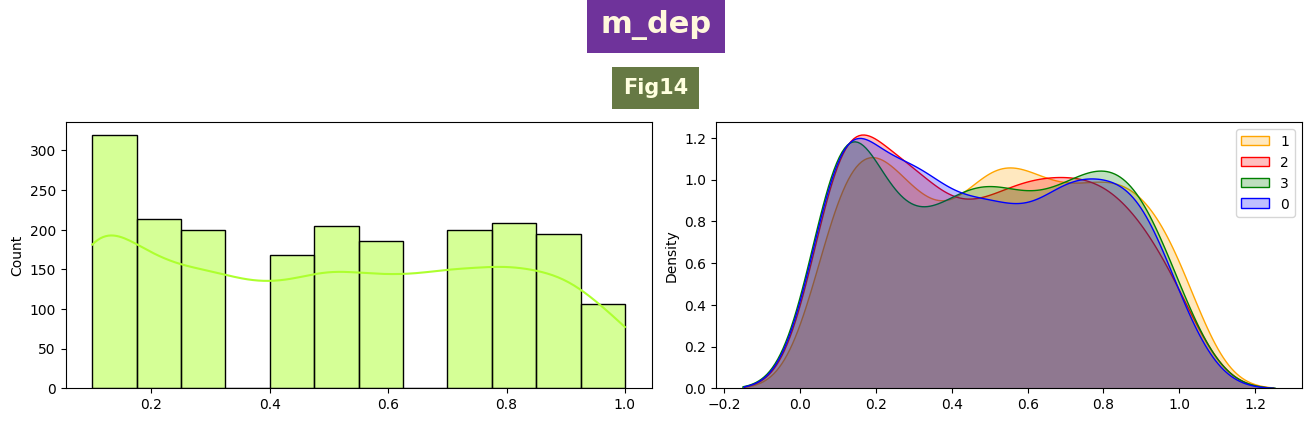

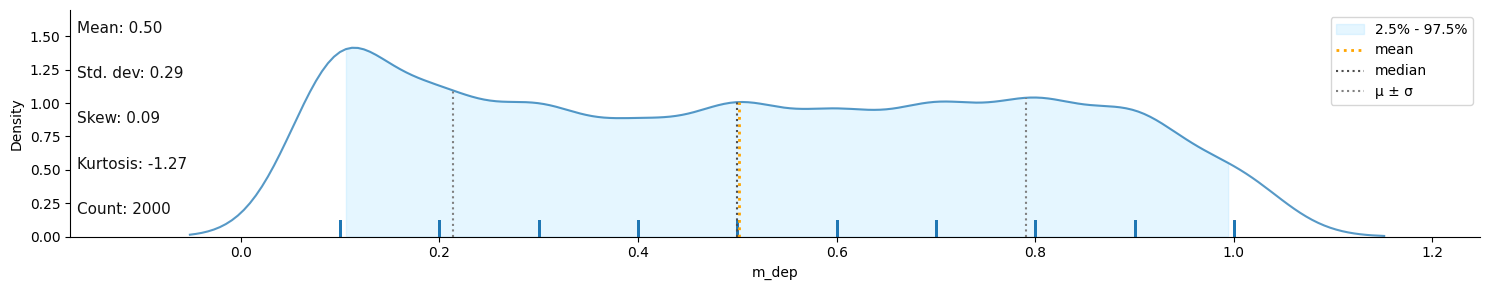

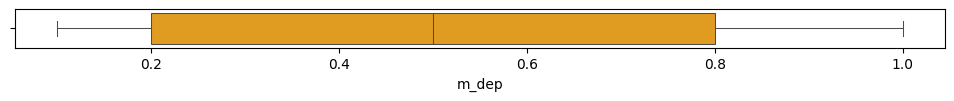

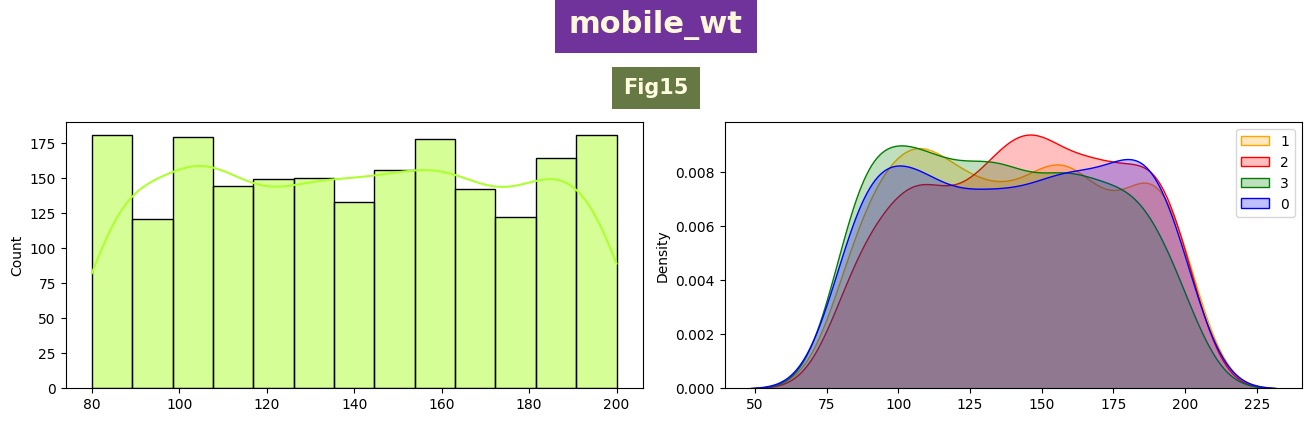

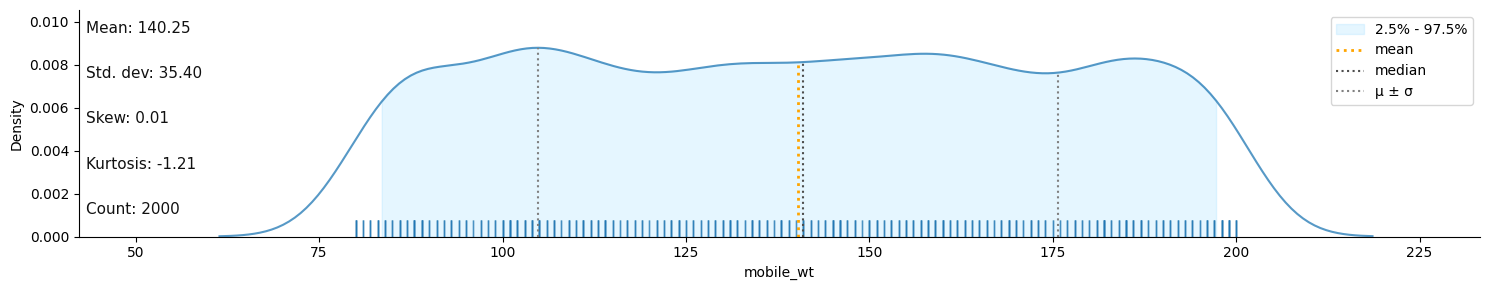

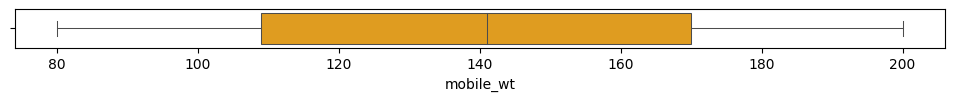

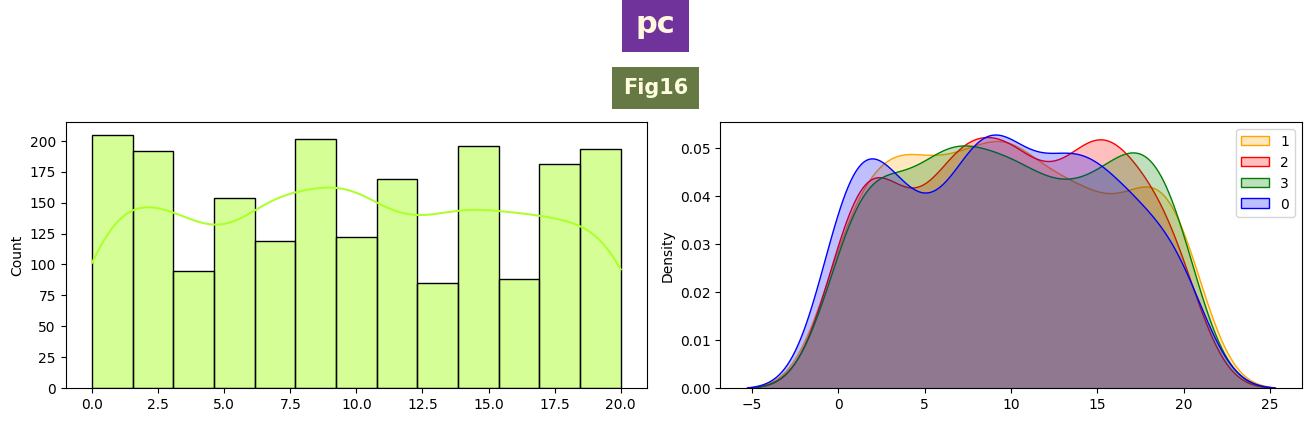

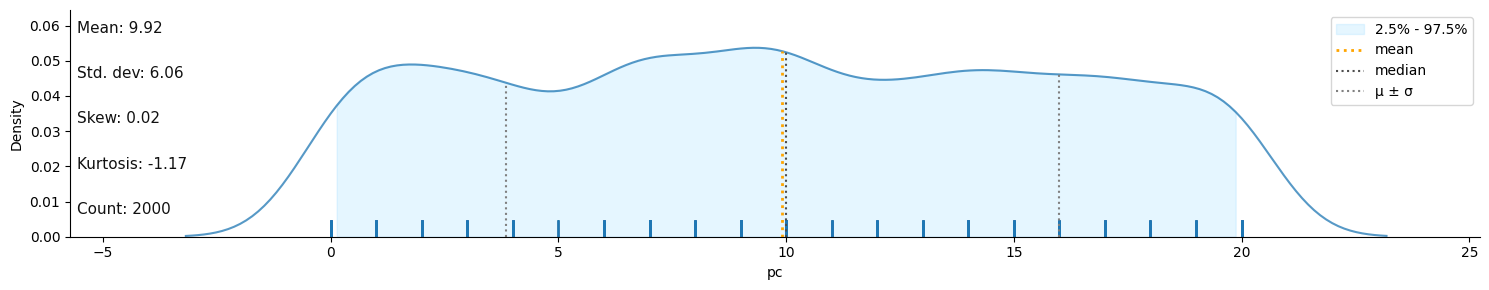

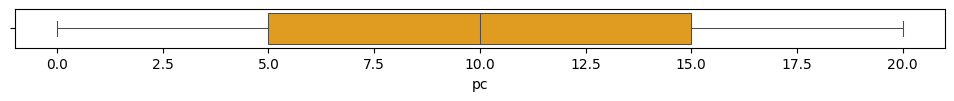

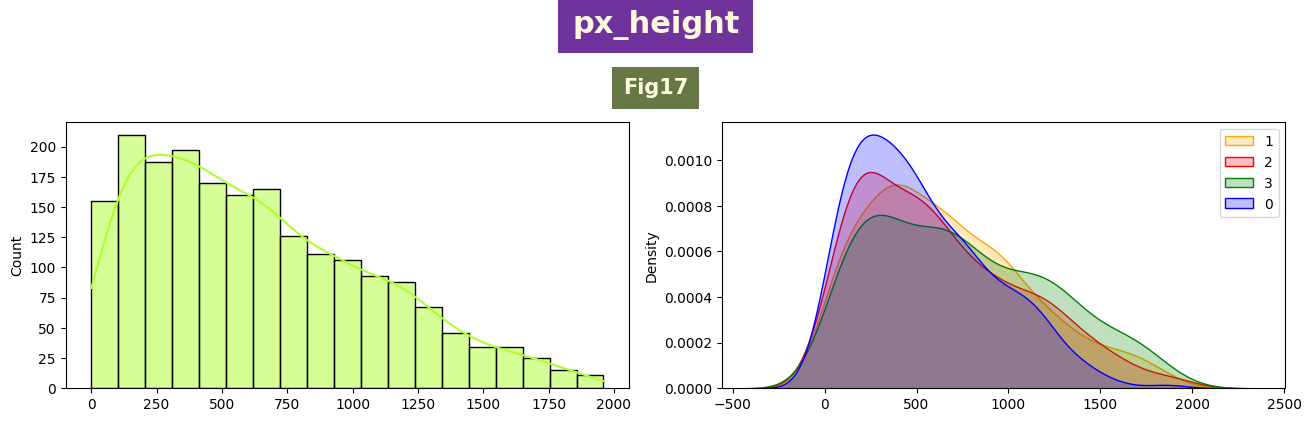

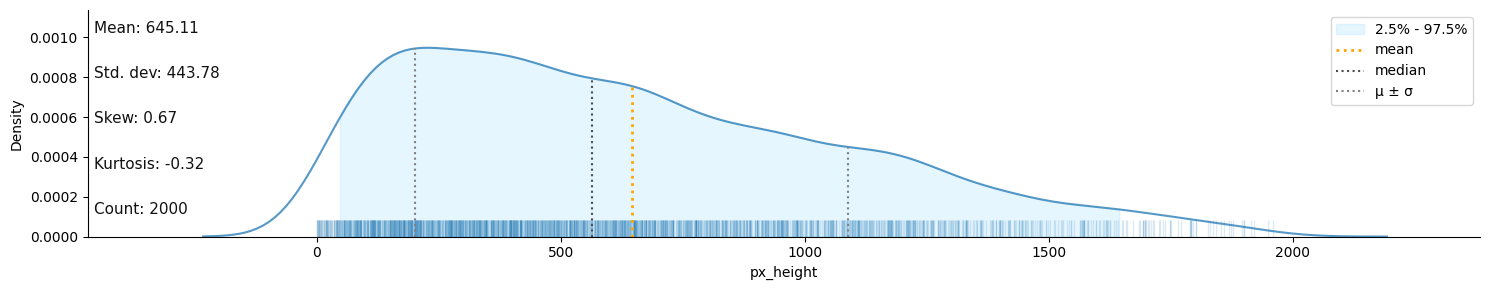

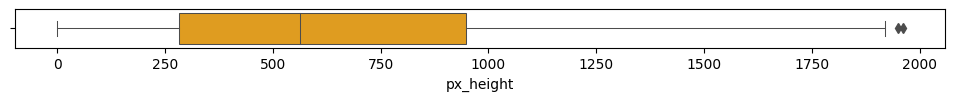

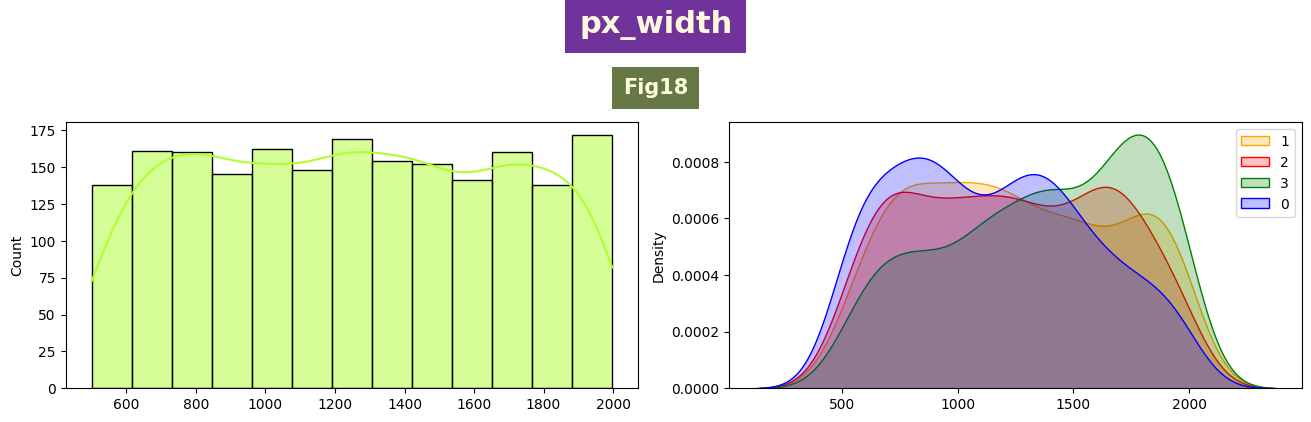

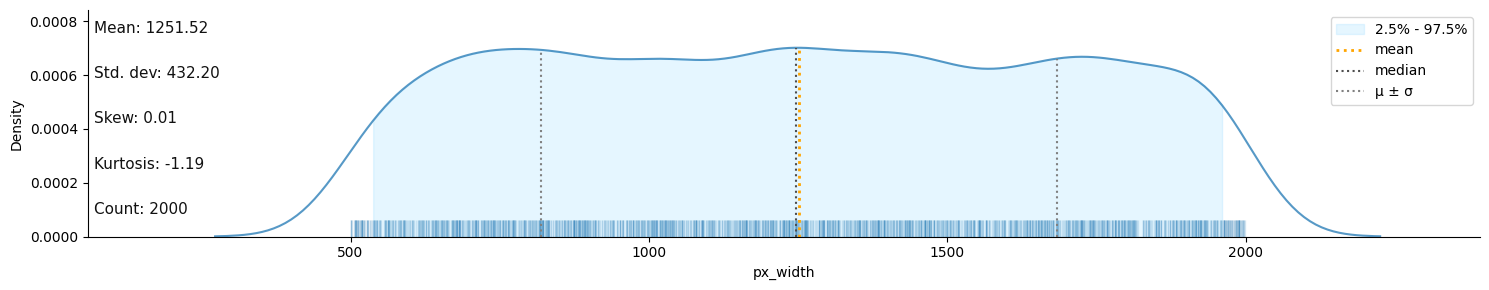

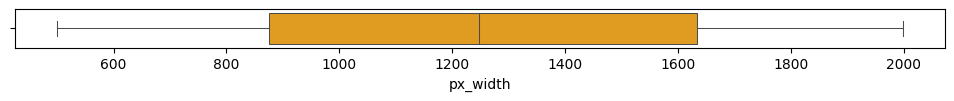

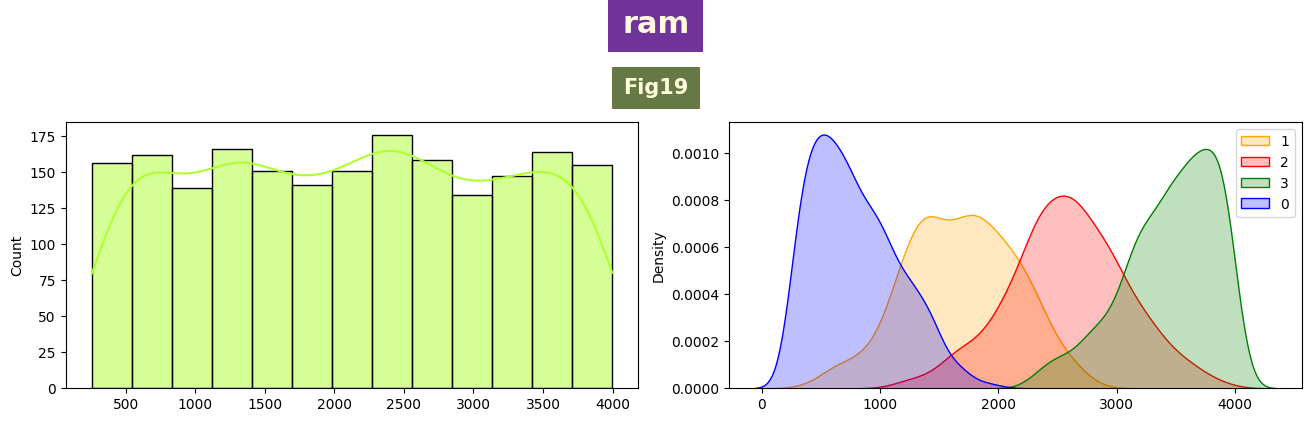

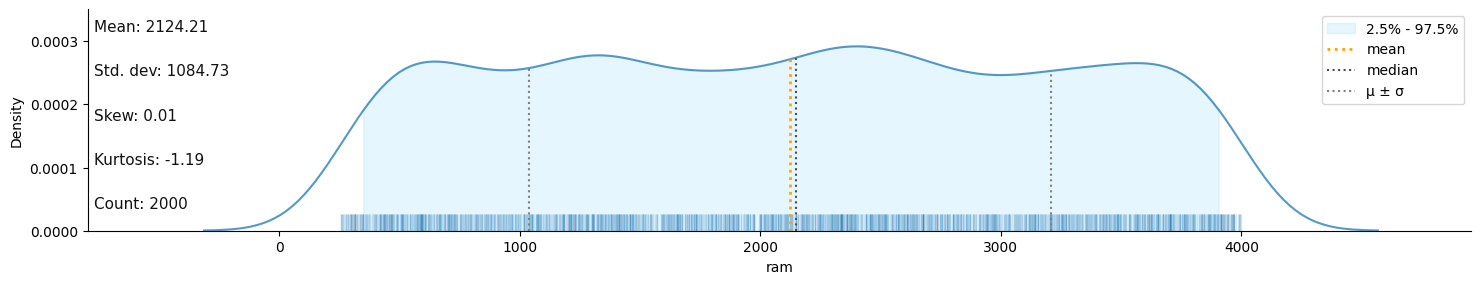

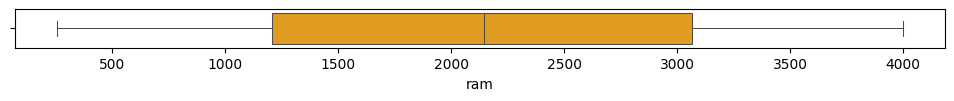

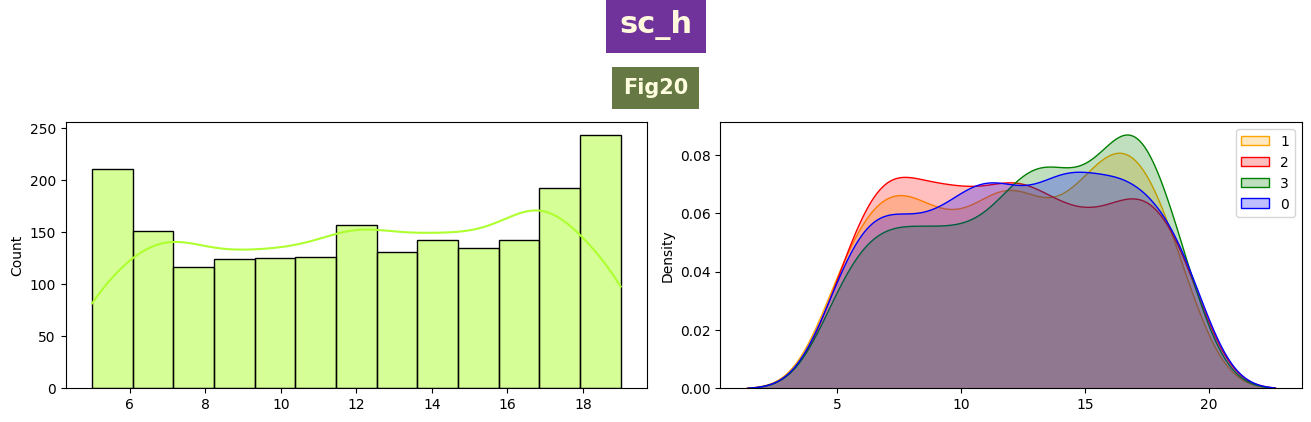

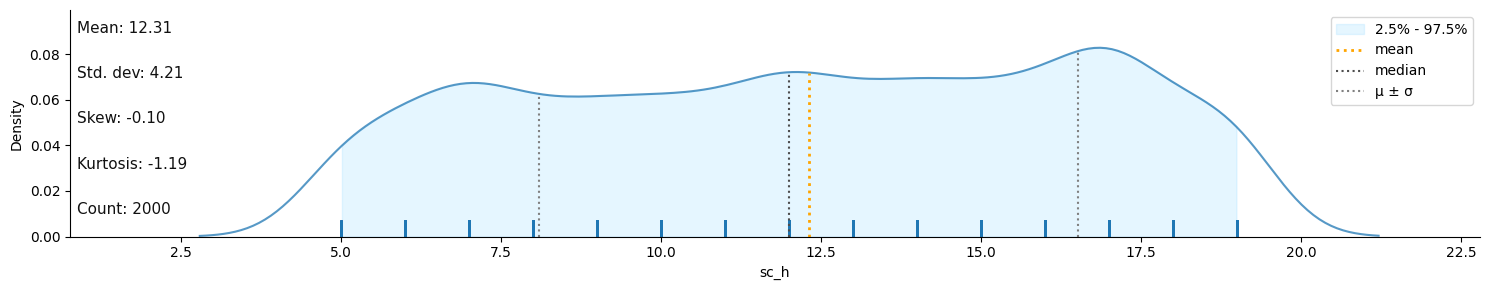

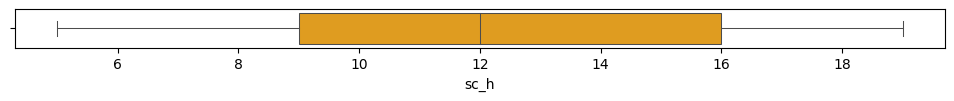

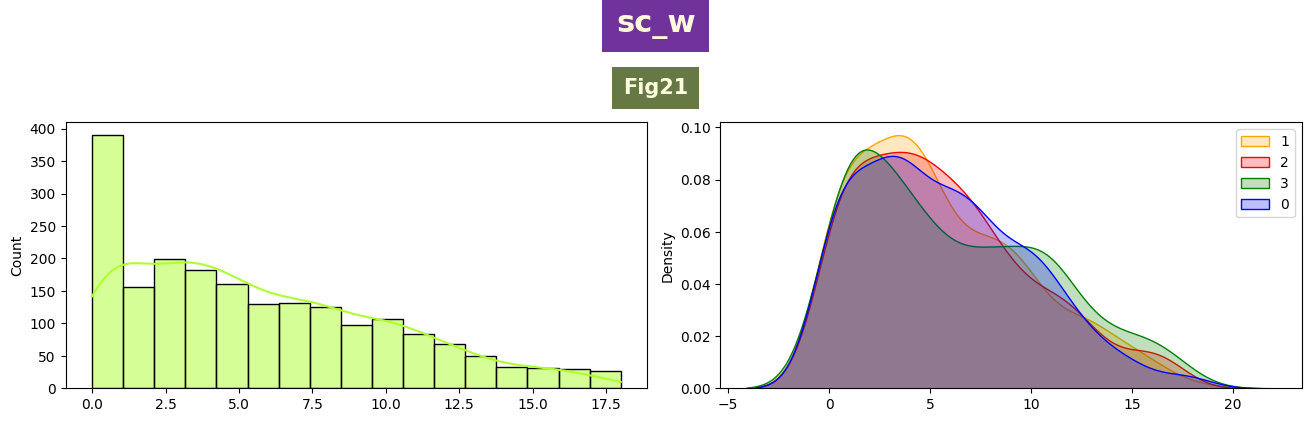

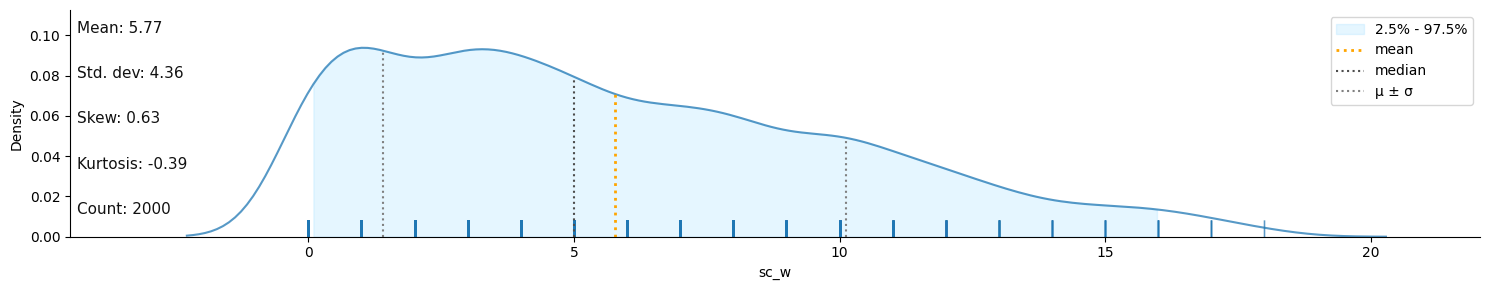

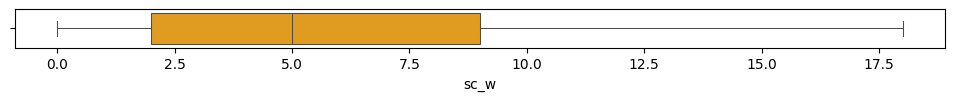

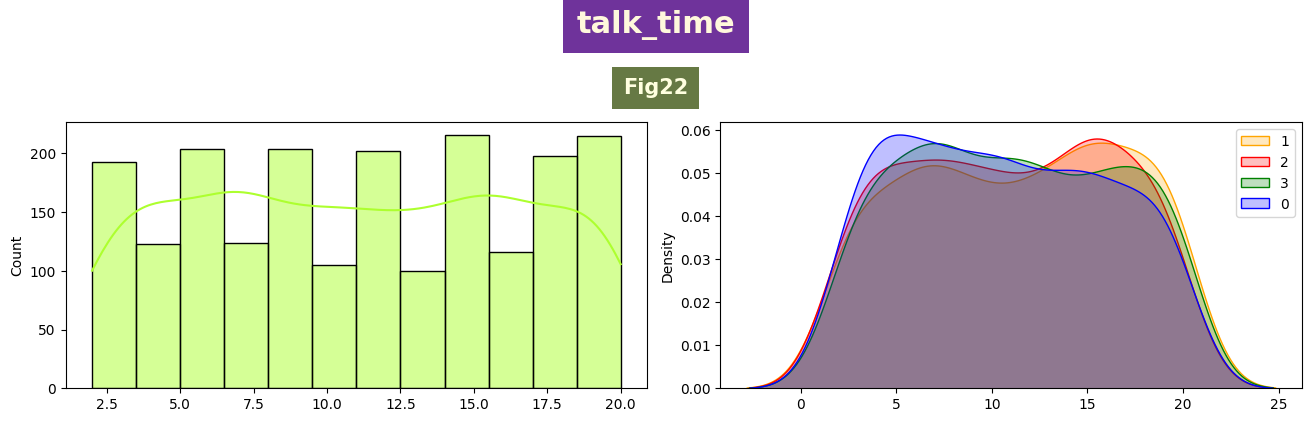

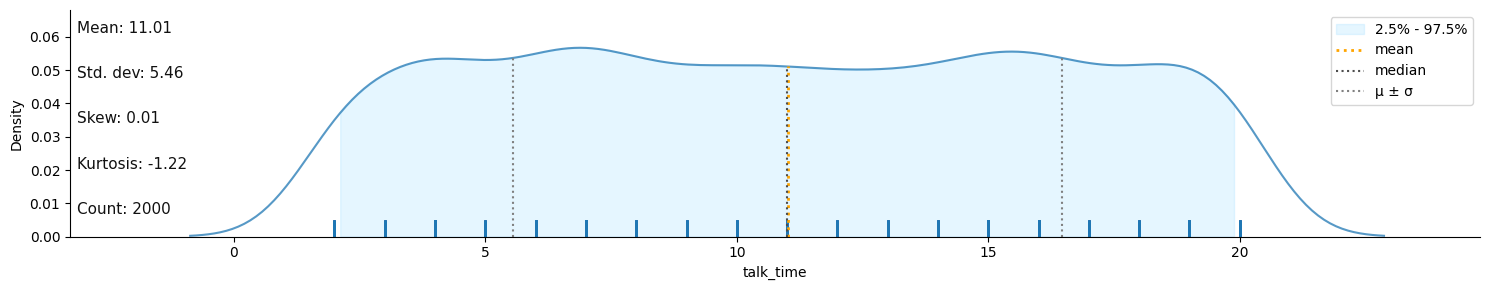

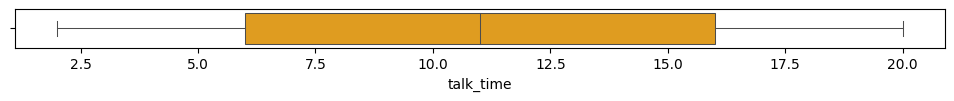

In [11]:
for i,col in enumerate(list(continuous_col.columns)):
    fig = plt.figure(figsize = (13,6),constrained_layout = True, dpi=100)
    GridSpec = gridspec.GridSpec(ncols=1, nrows=2, figure= fig)
    fig.suptitle(col,fontsize=22, fontweight='bold', color='cornsilk', y=1.18 ,
                 bbox=dict(facecolor='indigo', alpha=0.8,linewidth=0,pad=10))
    fig.text(0.5, 1.05, f'Fig{i+10}', fontsize=15, ha='center', va='center', color='lightyellow', fontweight='bold',
             bbox=dict(facecolor='darkolivegreen', alpha=0.9,linewidth=0,pad=8))

    # Subfigure 
    subfigure = fig.add_subfigure(GridSpec[0,:])
    # Adding subplots to subfigure 
    subplots = subfigure.subplots(1,2)
    
    # Subplot 1
    ax = sns.histplot(x=df_original[col],kde=True,color = 'greenyellow',ax=subplots[0])
    ax.set(xlabel='')
    # Subplot 2
    color=['blue','orange','red','green']
    for j in list(df_original['price_range'].unique()) :
        ax = sns.kdeplot(df_original[df_original['price_range']==j][col],color=color[j],fill=True,label=j,ax=subplots[1])
        ax.set(xlabel='')
        plt.legend()
    # Subplot 3   
    klib.dist_plot(continuous_col[col])
    plt.figure(figsize=(12,0.5))
    sns.boxplot(x=df_original[col],color='orange', linewidth=.75)

    plt.show()
    print('\n')

<p style="font-family: cursive; font-size:1.2em;color:crimson;"><b> Conclusion of Part C </b></p>
 
    we see distribution of continuous features and also distribution of them in four target's categories in fig10-fig22
    => battery_power :
       - the range of battery power is almost (500,2000)(Fig10)
       - the mean value is 1238.52
       - most number of devices with low price have battery power lower than the mean value(64.2%)
       - most number of devices with very high price have battery power higher than the mean value(64.8%)
       - we don't see any noise or outlier in plots of this feature
       - as a result, this feature has a small effect on the target
    => clock_speed :
       - the range of clock speed is (0.5,3)(Fig11)
       - as seen the plots, many devices have clock speed in range (0.5,0.75), almost 27.55%
       - we don't see any outlier in box plot of this feature
       - all four categories of price range is shown in this feature's range that means this feature doesn't have 
       significant effect on target
    => fc : 
       - the range of quality of front camera is (0,19)(Fig12)
       - 23.7% of devices don't have front camera(fc = 0)
       - all plots are right-skewed because almost 60% devices have fc < mean(4.31)
       - points that we see on box plot are not noises, a few devices have fc > 16 (almost 0.9%) and it's resonable
       - the plot of the distribution of price range categories at various values of fc shows that this feature is not an 
       effective one for determining price.
    => int_memory :
       - the range of internal memory is (2,64)(Fig13)
       - distribution of devices with lower value of internal memory than the mean(32.05) is almost equal to higher than it
       - as seen above, there are four categories of price range in any amount of internal memory that shows very low 
       effect of this feature and the importance of other features besides this feature on the target
    => m_dep :
       - the range of mobile depth is (0.1,1)(Fig14)
       - the number of devices with depth <= mean(0.5) is a little more than the number of them with depth > mean
       - Devices with a depth of 0.1 are the most, and those with a depth of 1 are the fewest.
       - all four categories of price range is shown in this feature's range that means this feature doesn't have 
       significant effect on target
    => mobile_wt : 
       - the range of mobile width is (80,200)(Fig15)
       - we see that the data are distributed normally across the range in all plots.
       - also kde plot doesn't indicate any effect on the target
    => pc :
       - the range of quality of primary camera is (0,20)(Fig16)
       - some devices don't have any primary camera.
       - all devices which don't have primary camera, don't have front camera too.
       - we can't see clear effect on target
    => px_height :
       - the range of pixel height is (0,1960)(Fig17)
       - many devices have px_height < 500 (44.85% all devices) while the minimum of px_width column is 500
       - points that we see on box plot are not noises and their values are resonable
       - there are two devices with px_height = 0 that are not valid, we can consider them as noisy samples.
       - all plots are right-skewed because more than 77% of devices have px_height < 1000
       - this feature has a small effect on target
    => px_width :
       - the range of pixel width is (500,1998)(Fig18)
       - 58.4% of low price devices have px_width < mean, and 61.2% of very high price devices have px_width > mean which 
       indicates a small effect on target.
    => ram :
       - the range of ram is (256,3998)(Fig19)
       - devices are distributed normally in the range
       - the range of low price devices' ram is (256,1974) and the range of very high price devices' ram is (2259,3998), we 
       see that the price increases by increasing the ram. 
       - all low price devices have ram < mean, all very high price devices have ram > mean , 81.4% medium price devices 
       have ram < mean, and 83.2% high price devices have ram > mean
       - this feature has a good and clear effect on target
    => sc_h :
       - the range of screen height is (5,19)(Fig20)
       - 55.4% very high price devices have sc_h > mean
       - this feature has not significant effect on target
    => sc_w :
       - the range of screen width is (0,17)(Fig21)
       - 9% of devices(180 devices) have sc_w = 0 that are not valid and we conseder them as noisy values.
       - 46.35% devices have screen width < 5 while the minimum of sc_h column is 5
       - all plots are almost right-skewed because more than 78% of devices have screen width < 10
       - this feature has not significant effect on target
    => talk_time :
       - the range of talk time is (2,20)(Fig22)
       - data are distributed normally
       - this feature has not any effect on the target

Text(0.5, 1.0, 'Pearson Correlation between all features with target $\\mathbf{Fig23}$')

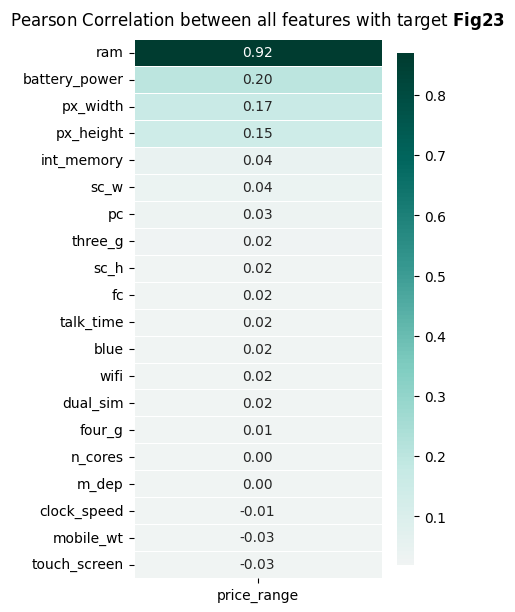

In [12]:
ax = klib.corr_plot(df_original, target='price_range',figsize=(4,7))
ax.set_title(f'Pearson Correlation between all features with target $\\mathbf{{{"Fig23"}}}$',fontsize=12,pad=10)

    - As shown in the correlation plot (Fig23), the ram column has the most effect on the target. battery_power, px_width, 
    and px_height columns have a very small impact on the target, and other features have no significant effect.

<p style="font-family: cursive; font-size:1.7em;color:Crimson;"><b> Most features' impact on the target </b></p>
<p style="font-family: cursive; font-size:1.1em;color:blue;"><b> 
        1 ) ram <br>
        2 ) battery_power <br>
        3 ) px_width <br>
        4 ) px_height <br>
    </b></p>

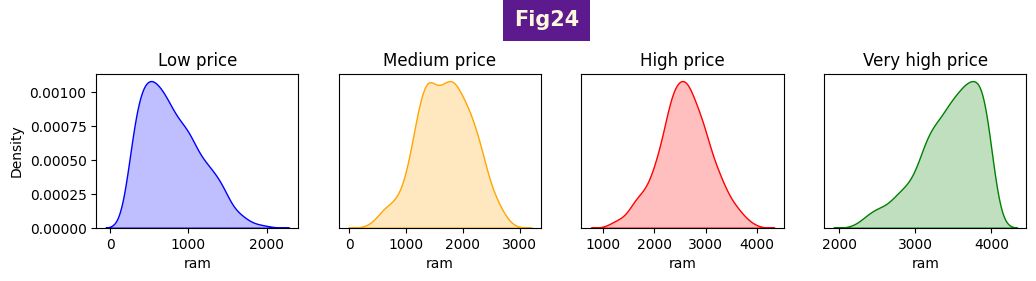

In [13]:
price_label = ['Low price','Medium price','High price','Very high price']
fig = plt.figure(figsize=(12,2))
fig.suptitle('Fig24',fontsize=15, fontweight='bold', color='cornsilk', y=1.2 ,
                 bbox=dict(facecolor='indigo', alpha=0.9,linewidth=0,pad=8))

for i in range(len(df_original['price_range'].unique())) :
    plt.subplot(1,4,i+1)
    ax = sns.kdeplot(df_original[df_original['price_range']==i],x='ram',color=color[i],fill=True)
    ax.set_title(price_label[i])
    if i != 0 :
        ax.set(yticklabels=[])
        ax.tick_params(left=False)
        ax.set(ylabel='')
plt.show()
####################################################################################
fig = px.scatter_3d(df_original, x='ram', y='int_memory', z='price_range',
              color='price_range')
fig.show()

    As seen in Fig24 ram column has the most clear effect on the target, the price of devices grows by increasing the ram. 
    As mentioned before in Fig19 and as shown here, the range of ram for low price devices is (256,1974), and  the range of 
    ram for very high price devices is (2259,3998).

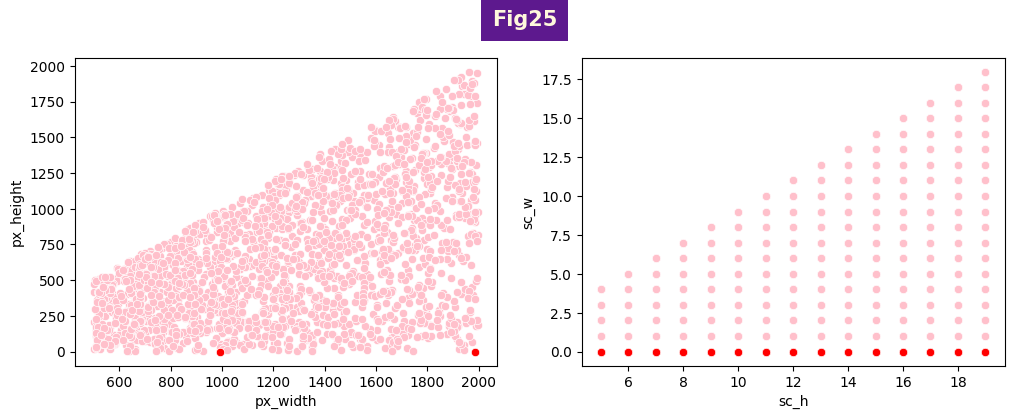

In [14]:
features = ['px_width','px_height','sc_h','sc_w']
fig = plt.figure(figsize=(12,4))
fig.suptitle('Fig25',fontsize=15, fontweight='bold', color='cornsilk', y=1 ,
                 bbox=dict(facecolor='indigo', alpha=0.9,linewidth=0,pad=8))
for i in range(2) :
    plt.subplot(1,2,i+1)
    sns.scatterplot(df_original,x=features[i*2], y=features[i*2+1],color=['pink'] )
    sns.scatterplot(df_original[df_original[features[i*2+1]]==0],x=features[i*2], y=features[i*2+1],color=['red'] )

    - As mentioned before, there are some unresonable values in px_height in comparison with their corresponding px_width 
    values like (9,1944),(67,1924),(91,1916),(70,1974),(5,1744),(3,1662) and many points like these that have a very small 
    px height and a large px width, and we don't know that they are correct or not.
    - There are two invalid points with px_height = 0 in (px_height,pw_width) form = (0,994),(0,1987) that we consider them 
    as noisy points.(red points on Fig25)
    - Also, there are some unresonable values in sc_w in comparison with their corresponding sc_h values, like (1,17), 
    (1,16), (2,18), and many points like these that have a very small screen width and a large screen height, and we don't 
    know that they are correct or not.
    - There are many invalid points with sc_w = 0 in (sc_w,sc_h) form like (0,18),(0,11),(0,7) and so on, that we consider 
    them as noisy points.(180 points, red points on Fig25)
    - We have nothing to do with unreasonable data for modeling, we just remove noisy data.

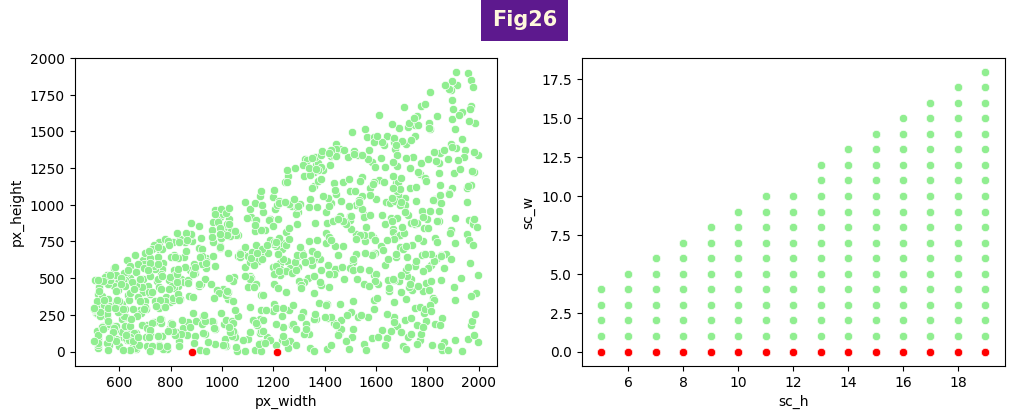

In [15]:
fig = plt.figure(figsize=(12,4))
fig.suptitle('Fig26',fontsize=15, fontweight='bold', color='cornsilk', y=1 ,
                 bbox=dict(facecolor='indigo', alpha=0.9,linewidth=0,pad=8))
for i in range(2) :
    plt.subplot(1,2,i+1)
    sns.scatterplot(df_unseen,x=features[i*2], y=features[i*2+1],color=['lightgreen'] )
    sns.scatterplot(df_unseen[df_unseen[features[i*2+1]]==0],x=features[i*2], y=features[i*2+1],color=['red'] )

    - As seen above, also there are some noisy points (px_height = 0 and sc_w = 0) in unseen data

<p style="font-family: cursive; font-size:1.2em;color:crimson;"><b> Remove Noisy Points and unnecessary column </b></p>
         
    - We remove all noisy points (px_height = 0 and ac_w = 0) in both datasets for cleaning them.
    - We remove a unnecessary column (id) in unseen dataset (df2).

In [16]:
df1 = df_original.copy()
df1 = df1[(df1['sc_w']>0)&(df1['px_height']>0)]
df1.reset_index(inplace=True)
df1.drop('index',axis=1,inplace=True)
display(df1)
df2 = df_unseen.copy()
df2 = df2[(df2['sc_w']>0)&(df2['px_height']>0)]
df2.reset_index(inplace=True)
df2.drop('index',axis=1,inplace=True)
df2.drop('id',axis=1,inplace=True)
display(df2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1815,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1816,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1817,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
2,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
3,1464,1,2.9,1,5,1,50,0.8,198,8,9,569,939,3506,10,7,3,1,1,1
4,1718,0,2.4,0,1,0,47,1.0,156,2,3,1283,1374,3873,14,2,10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,936,1,1.4,1,0,0,46,0.8,139,2,0,265,886,684,8,5,12,1,1,1
882,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
883,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
884,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


<p style="font-family: cursive; font-size:2.5em;color:green;"> 
    <b>4) Modeling(Machine Learning)</b>
    </p>

<p style="font-family: cursive; font-size:1.7em;color:crimson;"> 
    <b>Normalization Function </b>
</p>

In [17]:
def Normalization(df,lst,rng) :
    ''' inputs
    df : the data frame that should be normal
    lst : list of columns of df that should be normal
    rng : the range of normalization 
    
        output
    df : normalized df_in  '''
    
    scaler = preprocessing.MinMaxScaler(feature_range = rng)
    df[lst] = scaler.fit_transform(df[lst])
    return df

<p style="font-family: cursive; font-size:1.7em;color:crimson;"> 
    <b>Decision Tree </b>
</p>

In [18]:
def D_Tree(x,y,test_size,max_depth) :
    
    acc_D_Tree = [] ## for storing model accuracy in different test_size and max_depth
    score_D_Tree = [] ## for storing model f1_score in different test_size and max_depth
    test_size_in = [] 
    max_depth_in = []
    
    for size in test_size :
        for depth in max_depth :
            x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=size,random_state=42)
            Model = DecisionTreeClassifier(max_depth=depth,random_state = 10)
            Model.fit(x_train,y_train)
            y_pred = Model.predict(x_test)
            acc_D_Tree.append(np.round(metrics.accuracy_score(y_test,Model.predict(x_test)),3))
            score_D_Tree.append(np.round(f1_score(y_test,Model.predict(x_test),average='macro'),3))
            test_size_in.append(size)
            max_depth_in.append(depth)
    result = pd.DataFrame( {'test_size' : test_size_in,
              'max_depth' : max_depth_in,
              'Accuracy' : acc_D_Tree,
              'f1_score' : score_D_Tree} )  
    
    display(result.style.highlight_max(color = 'pink', axis = 0,subset=result.columns[2:]))

<p style="font-family: cursive; font-size:1.7em;color:crimson;"> 
    <b>Random Forest </b>
</p>

In [19]:
def Random_Forest(x,y,test_size,max_depth) :
    
    acc_RF = [] ## for storing model accuracy in different test_size and max_depth
    score_RF = [] ## for storing model f1_score in different test_size and max_depth
    test_size_in = []
    max_depth_in = []
    
    for size in test_size :
        for depth in max_depth :
            x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=size,random_state=42)
            Model = RandomForestClassifier(n_estimators=100,max_depth=depth,random_state = 10)
            Model.fit(x_train,y_train)
            y_pred = Model.predict(x_test)
            acc_RF.append(np.round(metrics.accuracy_score(y_test,Model.predict(x_test)),3))
            score_RF.append(np.round(f1_score(y_test,Model.predict(x_test),average='macro'),3))
            test_size_in.append(size)
            max_depth_in.append(depth)
    result = pd.DataFrame( {'test_size' : test_size_in,
                            'max_depth' : max_depth_in,
                            'Accuracy' : acc_RF,
                            'f1_score' : score_RF} )  
    
    display(result.style.highlight_max(color = 'pink', axis = 0,subset=result.columns[2:]))

<p style="font-family: cursive; font-size:1.7em;color:crimson;"> 
    <b>SVM </b>
</p>

In [20]:
def SVM(x,y,test_size,shape) :
    
    acc_SVM = []
    score_SVM = []
    test_size_in = []
    
    for size in test_size :
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=size,random_state=42)
        Model = svm.SVC(C=0.3,gamma="auto",kernel='linear',decision_function_shape=shape,random_state = 10)
        Model.fit(x_train,y_train.ravel())
        y_pred = Model.predict(x_test)
        acc_SVM.append(np.round(metrics.accuracy_score(y_test,Model.predict(x_test)),3))
        score_SVM.append(np.round(f1_score(y_test,Model.predict(x_test),average='macro'),3))
        test_size_in.append(size)
    result = pd.DataFrame( {'test_size' : test_size_in,
                            'Accuracy' : acc_SVM,
                            'f1_score' : score_SVM} )  
    
    display(result.style.highlight_max(color = 'pink', axis = 0,subset=result.columns[1:]))

<p style="font-family: cursive; font-size:1.7em;color:darkviolet;"> 
    <b>Create and Evaluate Models on df1  </b>
</p>

In [21]:
df_Normal = df1.copy()
df_Normal = Normalization(df_Normal,df1.columns[:-1],(1,5))
#################### x,y ##############################
x = df_Normal.drop('price_range',axis=1)
y = df_Normal['price_range'].values.reshape(-1,1)

print('The result of Decision Tree : ')
D_Tree(x,y,[0.1,0.15,0.2,0.25,0.3],[2,3,4,5,6,7,8])
print('*'*120)

print('The result of Random Forest : ')
Random_Forest(x,y,[0.1,0.15,0.2,0.25,0.3],[2,3,4,5,6,7,8])

print('The result of SVM by "ovr" shape : \n')
SVM(x,y,[0.1,0.15,0.2,0.25,0.3],'ovr')
print('The result of SVM by "ovo" shape : \n')
SVM(x,y,[0.1,0.15,0.2,0.25,0.3],'ovo')

The result of Decision Tree : 


,test_size,max_depth,Accuracy,f1_score
0,0.100000,2,0.753000,0.752000
1,0.100000,3,0.753000,0.753000
2,0.100000,4,0.791000,0.788000
3,0.100000,5,0.808000,0.808000
4,0.100000,6,0.841000,0.840000
5,0.100000,7,0.830000,0.831000
6,0.100000,8,0.824000,0.824000
7,0.150000,2,0.744000,0.749000
8,0.150000,3,0.747000,0.755000
9,0.150000,4,0.773000,0.769000


************************************************************************************************************************
The result of Random Forest : 


,test_size,max_depth,Accuracy,f1_score
0,0.100000,2,0.626000,0.600000
1,0.100000,3,0.698000,0.688000
2,0.100000,4,0.808000,0.798000
3,0.100000,5,0.797000,0.791000
4,0.100000,6,0.852000,0.846000
5,0.100000,7,0.841000,0.837000
6,0.100000,8,0.852000,0.848000
7,0.150000,2,0.656000,0.634000
8,0.150000,3,0.733000,0.723000
9,0.150000,4,0.788000,0.784000


The result of SVM by "ovr" shape : 



,test_size,Accuracy,f1_score
0,0.100000,0.945000,0.944000
1,0.150000,0.945000,0.945000
2,0.200000,0.953000,0.954000
3,0.250000,0.963000,0.963000
4,0.300000,0.947000,0.947000


The result of SVM by "ovo" shape : 



,test_size,Accuracy,f1_score
0,0.100000,0.945000,0.944000
1,0.150000,0.945000,0.945000
2,0.200000,0.953000,0.954000
3,0.250000,0.963000,0.963000
4,0.300000,0.947000,0.947000


    As seen above, SVM has the best result on df1.
    Accuracy :  0.963 , f1_score :  0.963 in test_size = 0.25

<p style="font-family: cursive; font-size:2.5em;color:chocolate;"> 
    <b>Final Model </b>
</p>

<p style="font-family: cursive; font-size:1.7em;color:darkolivegreen;"> 
    <b>The best model with the best result is SVM</b>
</p>
    <p style="font-family: cursive; font-size:1.1em;color:chocolate;"><b> 
         Accuracy : 0.963 <br>
         f1_score : 0.963 <br>
    </b></p>

In [22]:
x = df_Normal.drop('price_range',axis=1)
y = df_Normal['price_range'].values.reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
Model = svm.SVC(C=0.3,gamma="auto",kernel='linear',decision_function_shape='ovr',random_state = 10)
Model.fit(x_train,y_train.ravel())
y_pred = Model.predict(x_test)

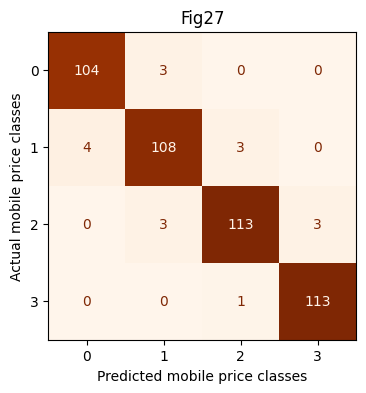

The number of train samples : 1364  
The number of test samples : 455 
the number of correct predicted values : 438


In [23]:
fig, ax = plt.subplots(figsize=(4, 4))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
cm_display.plot(ax=ax,colorbar=False, cmap='Oranges')
ax.set_ylabel('Actual mobile price classes')
ax.set_xlabel('Predicted mobile price classes')
ax.set_title('Fig27')
plt.show()

print(f'The number of train samples : {Fore.RED}{len(x_train)}{Style.RESET_ALL}  \nThe number of test samples : {Fore.RED}{len(x_test)}{Style.RESET_ALL} ')
print(f'the number of correct predicted values : {Fore.RED}{np.trace(confusion_matrix(y_test,Model.predict(x_test)))}{Style.RESET_ALL}')


<p style="font-family: cursive; font-size:1.7em;color:crimson;"> 
    <b>Unseen data prediction </b>
</p>

In [24]:
df2['price_range'] = 0
df2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,0
1,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,0
2,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,0
3,1464,1,2.9,1,5,1,50,0.8,198,8,9,569,939,3506,10,7,3,1,1,1,0
4,1718,0,2.4,0,1,0,47,1.0,156,2,3,1283,1374,3873,14,2,10,0,0,0,0


In [25]:
df_new = pd.concat([df1,df2])
df_new

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,936,1,1.4,1,0,0,46,0.8,139,2,0,265,886,684,8,5,12,1,1,1,0
882,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0,0
883,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1,0
884,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0,0


In [26]:
x_train = df_new[:1819].drop('price_range',axis=1).values
y_train = df_new[:1819]['price_range'].values.reshape(-1,1)
x_test = df_new[1819:].drop('price_range',axis=1).values

Model.fit(x_train,y_train.ravel())
y_pred = Model.predict(x_test)

In [27]:
df2 = df2.drop('price_range',axis=1)
df2.insert(20,'price_range',y_pred)
df2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,3
1,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,2
2,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,1
3,1464,1,2.9,1,5,1,50,0.8,198,8,9,569,939,3506,10,7,3,1,1,1,3
4,1718,0,2.4,0,1,0,47,1.0,156,2,3,1283,1374,3873,14,2,10,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,936,1,1.4,1,0,0,46,0.8,139,2,0,265,886,684,8,5,12,1,1,1,0
882,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0,2
883,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1,1
884,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0,2


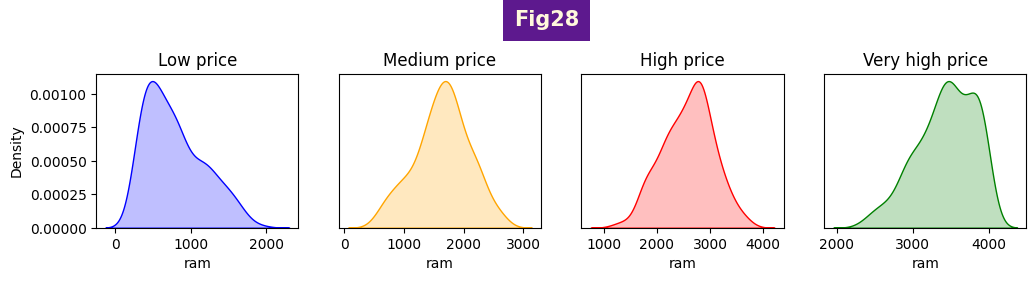

In [28]:
price_label = ['Low price','Medium price','High price','Very high price']
fig = plt.figure(figsize=(12,2))
fig.suptitle('Fig28',fontsize=15, fontweight='bold', color='cornsilk', y=1.2 ,
                 bbox=dict(facecolor='indigo', alpha=0.9,linewidth=0,pad=8))

for i in range(len(df2['price_range'].unique())) :
    plt.subplot(1,4,i+1)
    ax = sns.kdeplot(df2[df2['price_range']==i],x='ram',color=color[i],fill=True)
    ax.set_title(price_label[i])
    if i != 0 :
        ax.set(yticklabels=[])
        ax.tick_params(left=False)
        ax.set(ylabel='')
plt.show()
#############################################################################
fig = px.scatter_3d(df2, x='ram', y='int_memory', z='price_range',
              color='price_range')
fig.show()

    - We can see here that Fig28 and Fig25 are almost similar together, which shows that the model operates really well on 
    unseen data. The range of ram for low price devices is (263,1914), and  the range of ram for very high price devices is 
    (2340,3989).

<p style="font-family: cursive; font-size:1.4em;color:green;"> 
    <b>I hope this notebook can help you learn more. If you have any questions or advice, please leave a comment. I will read and answer them all ;) </b>
</p>

